## ML Project
#### Submitted By:
- **Niv Harel**: 208665869
- **Eytan Muzafi**: 209160308

#### Github: [https://github.com/nivrl/Machine-learning-project]

#### Imports

In [1]:
#!pip install scikit-learn

In [2]:
import pandas as pd
import math
from datetime import datetime
import numpy as np
import re
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#### Reading and understanding the dataset

In [3]:
Behaviors= pd.read_excel("Behaviors.xlsx",index_col=0)  
Bins= pd.read_excel("Bins.xlsx",index_col=0)  
Infrastructures= pd.read_excel("Infrastructures.xlsx",index_col=0)  
Dirt_Condition= pd.read_excel("Dirt_Condition.xlsx",index_col=0)  

In [4]:
#Infrastructures.head()

In [5]:
#Dirt_Condition.head()

In [6]:
#Dirt_Condition.columns.tolist()

In [7]:
#Infrastructures.columns.tolist()

In [8]:
Infrastructures = Infrastructures.reset_index()
Dirt_Condition = Dirt_Condition.reset_index()
Bins = Bins.reset_index()

#### Creating dictionaries for columns renaming 

In [9]:
bins_mapping = {
    'זמן סיום מהמערכת' : 'End_Time',
    'יישוב': 'City',
    'סמל_יישוב': 'City_Code',
    'שעת הגעה לנקודה': 'Arrival_Time',
    'נ.צ כתובת': 'Coordinate_Address',
    'כתובת תיאור מיקום נקודת המדידה': 'Measurement_Point_Description',
    'סוגנ קודת המדידה': 'Point_Type',
    'האם יש פחים בנקודת המדידה': 'Has_Bins',
    'כמה פחים יש בנקודת המדידה': 'Bin_Count',
    'סוג': 'Type',
    'מצב הפח': 'Bin_Condition',
    'מפלס הפסולת בפח': 'Waste_Level',
    'מפלס הפסולת בפח במספר': 'Waste_Level_Number'
}

dirt_condition_mapping = {
    'זמן סיום מהמערכת' : 'End_Time',
    'יישוב': 'City',
    'סמל יישוב': 'City_Code',
    'שעת הגעה לנקודה': 'Arrival_Time',
    'נ.צ כתובת': 'Coordinate_Address',
    'כתובת תיאור מיקום נקודת המדידה': 'Measurement_Point_Description',
    'סוג נקודת המדידה': 'Point_Type',
    'בדלי סיגריות': 'Cigarette_Butts',
    'קופסאות סיגריות': 'Cigarette_Boxes',
    'מסכות כירורגיות': 'Surgical_Masks',
    'מכלי משקה למיניהם': 'Drink_Containers',
    'פקקים של מכלי משקה': 'Drink_Container_Caps',
    'אריזות מזון Take Away נייר': 'Paper_Takeaway_Packaging',
    'אריזות מזון Take Away פלסטיק': 'Plastic_Takeaway_Packaging',
    'צלחות חדפ': 'Disposable_Plates',
    'סכום חדפ': 'Disposable_Cutlery',
    'כוסות שתייה קרה חדפ': 'Disposable_Cold_Drink_Cups',
    'כוסות שתייה חמה חדפ': 'Disposable_Hot_Drink_Cups',
    'אריזות של חטיפים': 'Snack_Packaging',
    'זכוכית לא מכלי משקה או לא ניתן לזיהוי': 'Non_Bottle_Glass',
    'נייר אחר לא אריזות מזון': 'Other_Paper',
    'פלסטיק אחר שקיות פלסטיק ורכיבי פלסטיק שאינם מכלי משקה אריזות מזון ומשקאות': 'Other_Plastic',
    'פסולת אורגנית': 'Organic_Waste',
    'פסולת בלתי חוקית שקית אשפה מלאה שהושלכה ברחוב': 'Illegal_Dumping',
    'פסולת אחרת למשל בגדים סוללות חומרי פרסום וכל מה שלא קוטלג בקבוצות האחרות': 'Other_Waste',
    'צואת כלבים': 'Dog_Feces',
    'כתמי מסטיק': 'Gum_Stains',
    'פריט פסולת גדול': 'Large_Waste_Item',
    'אריזות קרטון': 'Cardboard_Packaging',
    'גרפיטי': 'Graffiti',
    'אחר1': 'Other1',
    'אחר2': 'Other2',
    'בנקודת המדידה נאספו x שקיות של פרטי לכלוך': 'Bags_Collected',
    'כמה אנשים עברו בנקודת המדידה בזמן התצפית': 'People_Passed_During_Observation'
}

infrastructures_mapping = {
    'זמןסיוםמהמערכת' : 'End_Time',
    'יישוב': 'City',
    'סמל_יישוב': 'City_Code',
    'שעתהגעהלנקודה': 'Arrival_Time',
    'נ.צכתובת': 'Coordinate_Address',
    'כתובתתיאורמיקוםנקודתהמדידה': 'Measurement_Point_Description',
    'התרשמותכלליתמנקודתהמדידה': 'General_Impression',
    'מדרכה': 'Sidewalk',
    'אבנישפה': 'Curb',
    'גדרות': 'Fences',
    'צמחייה': 'Vegetation',
    'הערות': 'Remarks',
    'point_type': 'Point_Type'
}



In [10]:
bins_renamed = Bins.rename(columns=bins_mapping)
dirt_condition_renamed = Dirt_Condition.rename(columns=dirt_condition_mapping)
infrastructures_renamed = Infrastructures.rename(columns=infrastructures_mapping)

In [11]:
#bins_renamed

### First Data Cleaning & Organizing 

Take the relevant columns for each DF

In [12]:
bins_df = bins_renamed[['City_Code','Measurement_Point_Description', 'Point_Type','Bin_Count','Has_Bins','End_Time']]
dirt_condition_df = dirt_condition_renamed.drop(['Arrival_Time','Coordinate_Address','Other1','Other2'], axis=1)
infrastructures_df = infrastructures_renamed.drop(['City', 'Arrival_Time','Coordinate_Address','Remarks'], axis=1)

#### Organizing the PKs for later merge: date, Measurement_Point_Description

In [13]:
bins_df['Measurement_Point_Description'] = bins_df['Measurement_Point_Description'].str.replace(r'[A-Za-z0-9_\n]', '', regex=True)
dirt_condition_df['Measurement_Point_Description'] = dirt_condition_df['Measurement_Point_Description'].str.replace(r'[A-Za-z0-9_\n]', '', regex=True)
infrastructures_df['Measurement_Point_Description'] = infrastructures_df['Measurement_Point_Description'].str.replace(r'[A-Za-z0-9_\n]', '', regex=True)

/var/folders/__/6ngt8fk11qs0ys9hzqfnr3k00000gn/T/ipykernel_48191/783171514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bins_df['Measurement_Point_Description'] = bins_df['Measurement_Point_Description'].str.replace(r'[A-Za-z0-9_\n]', '', regex=True)


In [14]:
infrastructures_df['End_Time'] = pd.to_datetime(infrastructures_df['End_Time'])
infrastructures_df['Date'] = infrastructures_df['End_Time'].dt.date

dirt_condition_df['End_Time'] = pd.to_datetime(dirt_condition_df['End_Time'])
dirt_condition_df['Date'] = dirt_condition_df['End_Time'].dt.date

bins_df['End_Time'] = pd.to_datetime(bins_df['End_Time'])
bins_df['Date'] = bins_df['End_Time'].dt.date

/var/folders/__/6ngt8fk11qs0ys9hzqfnr3k00000gn/T/ipykernel_48191/2211815036.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bins_df['End_Time'] = pd.to_datetime(bins_df['End_Time'])
/var/folders/__/6ngt8fk11qs0ys9hzqfnr3k00000gn/T/ipykernel_48191/2211815036.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bins_df['Date'] = bins_df['End_Time'].dt.date


##### Handling Nulls (pre condition for merging the DFs) - Only for bin_count and has_bins

In [15]:
avg_bin_count_per_city = (
    bins_df
    .groupby(['City_Code'], as_index=False)
    .agg({'Bin_Count': 'mean'}) ## add avg count of gerbege
)


In [16]:
avg_bin_count_per_city.isnull().sum()

City_Code    0
Bin_Count    3
dtype: int64

In [17]:
# fill nulls with the avg
avg_bin_count_per_city.Bin_Count = avg_bin_count_per_city.Bin_Count.fillna(avg_bin_count_per_city.Bin_Count.mean())
avg_bin_count_per_city.head()

,City_Code,Bin_Count
0,2,1.555556
1,8,3.029412
2,12,4.500000
3,29,7.114286
4,31,3.400000


In [18]:
# round to get integer numbers
## NIV: WITH AI??, why do the round twice? 
avg_bin_count_per_city['Bin_Count'] = avg_bin_count_per_city['Bin_Count'].apply(
    lambda x: math.ceil(x) if x - int(x) > 0.5 else math.floor(x))

In [19]:
avg_bin_count_per_city.head()

,City_Code,Bin_Count
0,2,2
1,8,3
2,12,4
3,29,7
4,31,3


In [20]:
bins_df['Fixed_Bin_Count'] = bins_df['Bin_Count'].combine_first(bins_df['City_Code'].map(
    avg_bin_count_per_city.set_index('City_Code')['Bin_Count']))

/var/folders/__/6ngt8fk11qs0ys9hzqfnr3k00000gn/T/ipykernel_48191/2699226169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bins_df['Fixed_Bin_Count'] = bins_df['Bin_Count'].combine_first(bins_df['City_Code'].map(


In [21]:
bins_df.head()
bins_df.shape

(2197, 8)

In [22]:
bins_df['Has_Bins'] = bins_df['Has_Bins'].replace('כן', True)
bins_df['Has_Bins'] = bins_df['Has_Bins'].replace('לא', False)
bins_df

/var/folders/__/6ngt8fk11qs0ys9hzqfnr3k00000gn/T/ipykernel_48191/152342849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bins_df['Has_Bins'] = bins_df['Has_Bins'].replace('כן', True)
/var/folders/__/6ngt8fk11qs0ys9hzqfnr3k00000gn/T/ipykernel_48191/152342849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bins_df['Has_Bins'] = bins_df['Has_Bins'].replace('לא', False)


,City_Code,Measurement_Point_Description,Point_Type,Bin_Count,Has_Bins,End_Time,Date,Fixed_Bin_Count
0,874,רחוב הראשונים מגדל העמק מגורים,רחוב מגורים,8.0,True,2021-07-12 08:23:34,2021-07-12,8.0
1,874,רחוב הראשונים מגדל העמק מגורים,רחוב מגורים,5.0,True,2021-07-12 08:23:34,2021-07-12,5.0
2,8500,רחוב בן צבי,רחוב מגורים,1.0,True,2021-07-12 14:22:37,2021-07-12,1.0
3,8500,רחוב בן צבי,רחוב מגורים,2.0,True,2021-07-12 14:22:37,2021-07-12,2.0
4,8500,רחוב הצנחנים,רחוב מגורים,1.0,True,2021-07-13 10:46:08,2021-07-13,1.0
...,...,...,...,...,...,...,...,...
2192,78,גן נגוהות,פנאי ונופש,NaN,False,2021-08-17 00:03:40,2021-08-17,6.0
2193,78,גן אדורה,פנאי ונופש,NaN,False,2021-08-17 11:49:15,2021-08-17,6.0
2194,78,מכולת מעון,מרכז מסחרי,NaN,False,2021-08-17 13:48:35,2021-08-17,6.0
2195,78,גן מעון,פנאי ונופש,NaN,False,2021-08-17 15:26:49,2021-08-17,6.0


In [23]:
#There is more then one row per pk's
bins_df = (
    bins_df
    .groupby(['City_Code', 'Measurement_Point_Description', 'Point_Type', 'End_Time','Date'], as_index=False)
    .agg({'Has_Bins': 'max','Fixed_Bin_Count': 'mean'}) 
)

In [24]:
bins_df.shape

(1533, 7)

In [25]:
bins_df['Bin_Count'] = bins_df['Fixed_Bin_Count'].apply(
    lambda x: math.ceil(x) if x - int(x) > 0.5 else math.floor(x))

In [26]:
bins_df.head(10)

,City_Code,Measurement_Point_Description,Point_Type,End_Time,Date,Has_Bins,Fixed_Bin_Count,Bin_Count
0,2,אור הגנוז,פנאי ונופש,2021-07-20 18:11:40,2021-07-20,True,1.0,1
1,2,אשכול גנים טפחות,מבנה ציבור,2021-07-20 18:57:31,2021-07-20,False,2.0,2
2,2,בר יוחאי - מרכז הישוב,פנאי ונופש,2021-07-21 22:19:28,2021-07-21,False,2.0,2
3,2,גן שעשועים אור הגנוז,פנאי ונופש,2021-07-20 09:32:48,2021-07-20,False,2.0,2
4,2,חנייה קבר הרשב״י,מבנה ציבור,2021-07-20 15:04:24,2021-07-20,False,2.0,2
5,2,כפר חנניה א,רחוב מגורים,2021-07-19 14:55:57,2021-07-19,False,2.0,2
6,2,כפר חנניה ב,רחוב מגורים,2021-07-19 15:01:47,2021-07-19,True,3.0,3
7,2,כפר שמאי,מבנה ציבור,2021-07-21 17:56:58,2021-07-21,False,2.0,2
8,2,מבנה ציבור תפרון (קופת חולים כללית),מבנה ציבור,2021-07-18 16:48:31,2021-07-18,False,2.0,2
9,2,מגרש כדורגל,פנאי ונופש,2021-07-22 14:45:44,2021-07-22,False,2.0,2


#### Merging DFs with inner joins 

In [27]:
merged_df = pd.merge(infrastructures_df, dirt_condition_df, on=[
    "City_Code", "Measurement_Point_Description", "Date"], how='inner')	

In [28]:
merged_df.shape

(1478, 38)

In [29]:
full_merged_df = pd.merge(merged_df, bins_df, on=
                          ["City_Code", "Measurement_Point_Description", "Date"], how='inner')	

In [30]:
relevant_columns = ['End_Time_x', 'Date', 'City', 'City_Code', 'Measurement_Point_Description', 'Point_Type_x',
       'Cigarette_Butts', 'Cigarette_Boxes', 'Surgical_Masks', 'Drink_Containers',
       'Drink_Container_Caps', 'Paper_Takeaway_Packaging',
       'Plastic_Takeaway_Packaging', 'Disposable_Plates', 'Disposable_Cutlery',
       'Disposable_Cold_Drink_Cups', 'Disposable_Hot_Drink_Cups',
       'Snack_Packaging', 'Non_Bottle_Glass', 'Other_Paper', 'Other_Plastic',
       'Organic_Waste', 'Illegal_Dumping', 'Other_Waste', 'Dog_Feces',
       'Gum_Stains', 'Large_Waste_Item', 'Cardboard_Packaging', 'Graffiti',
       'Bags_Collected', 'People_Passed_During_Observation', 'Has_Bins','Bin_Count',
       'General_Impression', 'Sidewalk', 'Curb', 'Fences', 'Vegetation']

full_merged_df = full_merged_df[relevant_columns]

In [31]:
full_merged_df.rename(columns=lambda col: col[:-2] if col.endswith('_x') else col, inplace=True)
full_merged_df.head()

,End_Time,Date,City,City_Code,Measurement_Point_Description,Point_Type,Cigarette_Butts,Cigarette_Boxes,Surgical_Masks,Drink_Containers,...,Graffiti,Bags_Collected,People_Passed_During_Observation,Has_Bins,Bin_Count,General_Impression,Sidewalk,Curb,Fences,Vegetation
0,2021-07-07 10:22:27,2021-07-07,רמלה,8500,רחוב זכריה,רחוב מגורים,2,4,0,0,...,0,1.0,7,False,1,3,סביר,סביר,סביר,סביר
1,2021-07-08 13:43:58,2021-07-08,מגדל העמק,874,מגדל העמק רחוב הזית,רחוב מסחרי,900,30,100,55,...,0,7.0,300,False,4,4,לא תקין (מוזנח),לא תקין (מוזנח),לא רלוונטי,לא תקין (מוזנח)
2,2021-07-08 15:29:42,2021-07-08,מגדל העמק,874,רחוב הראשונים - שוק,רחוב מסחרי,100,3,15,5,...,0,5.0,125,False,4,4,תקין (מטופח),תקין (מטופח),תקין (מטופח),לא רלוונטי
3,2021-07-08 18:29:40,2021-07-08,מגדל העמק,874,רחוב בוסקילה פארק משחקים (שניים סמוכים),פנאי ונופש,53,2,12,30,...,0,2.0,73,False,4,2,תקין (מטופח),תקין (מטופח),תקין (מטופח),לא רלוונטי
4,2021-07-08 20:25:47,2021-07-08,מגדל העמק,874,פארק הראשונים - פנאי ונופש,פנאי ונופש,999,8,8,7,...,15,2.0,212,False,4,3,תקין (מטופח),תקין (מטופח),תקין (מטופח),תקין (מטופח)


In [32]:
full_merged_df.shape

(1626, 38)

#### Fetching dtypes

In [33]:
full_merged_df.dtypes

End_Time                            datetime64[ns]
Date                                        object
City                                        object
City_Code                                    int64
Measurement_Point_Description               object
Point_Type                                  object
Cigarette_Butts                              int64
Cigarette_Boxes                              int64
Surgical_Masks                               int64
Drink_Containers                             int64
Drink_Container_Caps                         int64
Paper_Takeaway_Packaging                     int64
Plastic_Takeaway_Packaging                   int64
Disposable_Plates                            int64
Disposable_Cutlery                           int64
Disposable_Cold_Drink_Cups                   int64
Disposable_Hot_Drink_Cups                    int64
Snack_Packaging                              int64
Non_Bottle_Glass                             int64
Other_Paper                    

In [34]:
full_merged_df['Date'] = pd.to_datetime(full_merged_df['Date'])

In [35]:
full_merged_df.dtypes

End_Time                            datetime64[ns]
Date                                datetime64[ns]
City                                        object
City_Code                                    int64
Measurement_Point_Description               object
Point_Type                                  object
Cigarette_Butts                              int64
Cigarette_Boxes                              int64
Surgical_Masks                               int64
Drink_Containers                             int64
Drink_Container_Caps                         int64
Paper_Takeaway_Packaging                     int64
Plastic_Takeaway_Packaging                   int64
Disposable_Plates                            int64
Disposable_Cutlery                           int64
Disposable_Cold_Drink_Cups                   int64
Disposable_Hot_Drink_Cups                    int64
Snack_Packaging                              int64
Non_Bottle_Glass                             int64
Other_Paper                    

In [36]:
for col in full_merged_df.columns:
    if col not in ['Measurement_Point_Description', 'Point_Type']:
        if full_merged_df[col].dtype not in ['int64', 'float64', 'datetime64[ns]']:
            full_merged_df[col] = full_merged_df[col].astype('category')

In [37]:
full_merged_df.dtypes

End_Time                            datetime64[ns]
Date                                datetime64[ns]
City                                      category
City_Code                                    int64
Measurement_Point_Description               object
Point_Type                                  object
Cigarette_Butts                              int64
Cigarette_Boxes                              int64
Surgical_Masks                               int64
Drink_Containers                             int64
Drink_Container_Caps                         int64
Paper_Takeaway_Packaging                     int64
Plastic_Takeaway_Packaging                   int64
Disposable_Plates                            int64
Disposable_Cutlery                           int64
Disposable_Cold_Drink_Cups                   int64
Disposable_Hot_Drink_Cups                    int64
Snack_Packaging                              int64
Non_Bottle_Glass                             int64
Other_Paper                    

In [38]:
full_merged_df.to_excel('full_merged_df.xlsx', index=False)

## Start Working On Full Raw Data Set

In [39]:
df= pd.read_excel("full_merged_df.xlsx") 

In [40]:
df.head()

,End_Time,Date,City,City_Code,Measurement_Point_Description,Point_Type,Cigarette_Butts,Cigarette_Boxes,Surgical_Masks,Drink_Containers,...,Graffiti,Bags_Collected,People_Passed_During_Observation,Has_Bins,Bin_Count,General_Impression,Sidewalk,Curb,Fences,Vegetation
0,2021-07-07 10:22:27,2021-07-07,רמלה,8500,רחוב זכריה,רחוב מגורים,2,4,0,0,...,0,1.0,7,False,1,3,סביר,סביר,סביר,סביר
1,2021-07-08 13:43:58,2021-07-08,מגדל העמק,874,מגדל העמק רחוב הזית,רחוב מסחרי,900,30,100,55,...,0,7.0,300,False,4,4,לא תקין (מוזנח),לא תקין (מוזנח),לא רלוונטי,לא תקין (מוזנח)
2,2021-07-08 15:29:42,2021-07-08,מגדל העמק,874,רחוב הראשונים - שוק,רחוב מסחרי,100,3,15,5,...,0,5.0,125,False,4,4,תקין (מטופח),תקין (מטופח),תקין (מטופח),לא רלוונטי
3,2021-07-08 18:29:40,2021-07-08,מגדל העמק,874,רחוב בוסקילה פארק משחקים (שניים סמוכים),פנאי ונופש,53,2,12,30,...,0,2.0,73,False,4,2,תקין (מטופח),תקין (מטופח),תקין (מטופח),לא רלוונטי
4,2021-07-08 20:25:47,2021-07-08,מגדל העמק,874,פארק הראשונים - פנאי ונופש,פנאי ונופש,999,8,8,7,...,15,2.0,212,False,4,3,תקין (מטופח),תקין (מטופח),תקין (מטופח),תקין (מטופח)


### Creating a grade column for Infrastructures_status in order to divide it into classes

In [41]:
for col in ["Sidewalk", "Curb", "Fences", "Vegetation"]:
    print(col)
    print(df[col].unique())
    print(df[col].isnull().sum())
df.General_Impression.isnull().sum()

Sidewalk
['סביר' 'לא תקין (מוזנח)' 'תקין (מטופח)' 'לא רלוונטי' nan]
21
Curb
['סביר' 'לא תקין (מוזנח)' 'תקין (מטופח)' 'לא רלוונטי' nan]
21
Fences
['סביר' 'לא רלוונטי' 'תקין (מטופח)' 'לא תקין (מוזנח)' nan]
21
Vegetation
['סביר' 'לא תקין (מוזנח)' 'לא רלוונטי' 'תקין (מטופח)' nan]
21


0

In [42]:
df_with_all_nulls = df[df[["Sidewalk", "Curb", "Fences", "Vegetation"]].isnull().all(axis=1)]
df_with_all_nulls.shape
# 21 rows

(21, 38)

In [43]:
status_mapping_dict = {
    'לא תקין (מוזנח)': 3,
    'סביר': 2,
    'תקין (מטופח)': 1,
    'לא רלוונטי':  pd.NA 
}

columns_to_replace = ["Sidewalk", "Curb", "Fences", "Vegetation"]

temp_df = df.copy()
# Replacing values in the specified columns using the mapping dictionary
temp_df['infrastructure_grade']=df[["Sidewalk", "Curb", "Fences", "Vegetation"]].replace(status_mapping_dict).mean(axis=1, skipna=True)


In [44]:
df_with_nulls = temp_df[temp_df[["Sidewalk", "Curb", "Fences", "Vegetation"]].isnull().all(axis=1)]
df_with_nulls.shape

(21, 39)

In [45]:
## smaller is better
temp_df['infrastructure_grade']

0       2.000000
1       3.000000
2       1.000000
3       1.000000
4       1.000000
          ...   
1621    2.500000
1622    2.000000
1623    2.250000
1624    3.000000
1625    2.666667
Name: infrastructure_grade, Length: 1626, dtype: float64

In [46]:
#Try to differentiate between infrastructures with different scores-
#We highlighted the differences between them to give more meaning for good infrastructures.

status_strong_2_mapping_dict = {
    'לא תקין (מוזנח)': 9,
    'סביר': 4,
    'תקין (מטופח)': 1,
    'לא רלוונטי':  pd.NA 
}

# List of columns where the mapping should be applied
columns_to_replace = ["Sidewalk", "Curb", "Fences", "Vegetation"]

# Replacing values in the specified columns using the mapping dictionary
temp_df['infrastructure_grade_strong'] = df[["Sidewalk", "Curb", "Fences", "Vegetation"]].replace(status_strong_2_mapping_dict).mean(axis=1, skipna=True)


In [47]:
temp_df.infrastructure_grade.isnull().sum() # 27 rows
# If all the infrastructure columns ia null or 'לא רלוונטי'-
# we are not able to calculate the grade of the row. so we decided to drop this rows
temp_df = temp_df.dropna(subset=["infrastructure_grade"])

In [48]:
df = temp_df.drop(["Sidewalk", "Curb", "Fences", "Vegetation","General_Impression"], axis=1)

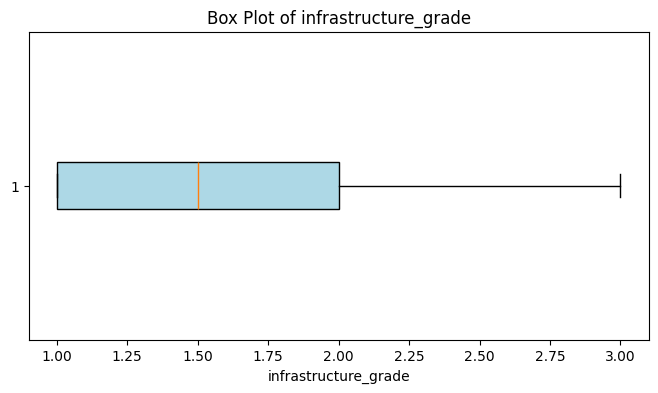

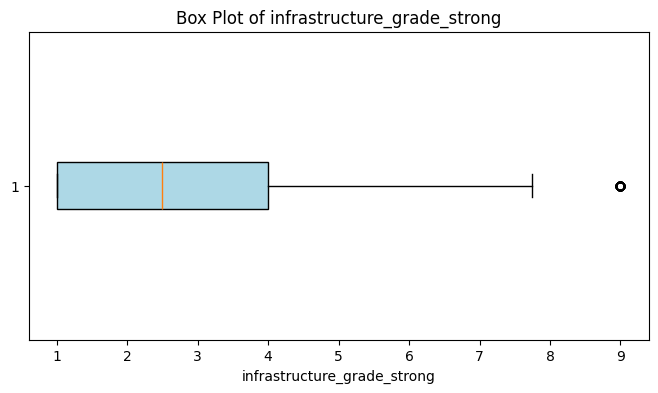

In [49]:
plt.figure(figsize=(8, 4))
plt.boxplot(df['infrastructure_grade'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of infrastructure_grade')
plt.xlabel('infrastructure_grade')
plt.show()

plt.figure(figsize=(8, 4))
plt.boxplot(df['infrastructure_grade_strong'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of infrastructure_grade_strong')
plt.xlabel('infrastructure_grade_strong')
plt.show()

#### Split the infrastructure_grade into clases
#### We are trying to cut tha data with qcut with 2 or 3 classes

In [50]:
# divide the grade to 3 classes. each class have the same number of rows. because we have alot of rows in good grade
df['infrastructure_final_grade'], bins = pd.qcut(df['infrastructure_grade_strong'],retbins=True, q=2,labels=False)
df[['infrastructure_final_grade','infrastructure_grade_strong']]
bins

array([1. , 2.5, 9. ])

In [51]:
# df['depth_bins_infrastructure_grade_strong'] = df['depth_bins_infrastructure_grade_strong'].replace(0, 'Great')
# # df['depth_bins_infrastructure_grade_strong'] = df['depth_bins_infrastructure_grade_strong'].replace(1, 'Good')
# # df['depth_bins_infrastructure_grade_strong'] = df['depth_bins_infrastructure_grade_strong'].replace(2, 'poor')

# df['depth_bins_infrastructure_grade_strong'] = df['depth_bins_infrastructure_grade_strong'].replace(1, 'poor')

In [52]:
def create_clases (number_of_clases: int , labels: list):
    df['infrastructure_class'] = pd.cut(df['infrastructure_grade_strong'] ,bins=number_of_clases, labels=labels)

    plt.figure(figsize=(8, 4))
    sns.scatterplot(
        data=df,
        x=df.index,  # Replace with the desired X-axis if not using the index
        y='infrastructure_grade_strong',
        hue='infrastructure_class'
    )
    
    # Labels and title
    plt.title('Scatter Plot: Infrastructure Grade vs infrastructure class', fontsize=10)
    plt.xlabel('Index', fontsize=8)  
    plt.ylabel('Infrastructure Grade Strong', fontsize=8)
    plt.legend(title='infrastructure class', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()
    
    

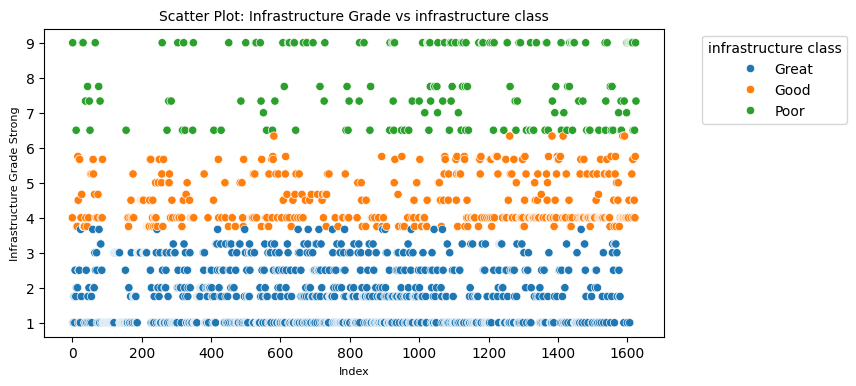

In [53]:
create_clases(number_of_clases = 3 , labels=['Great','Good','Poor'])

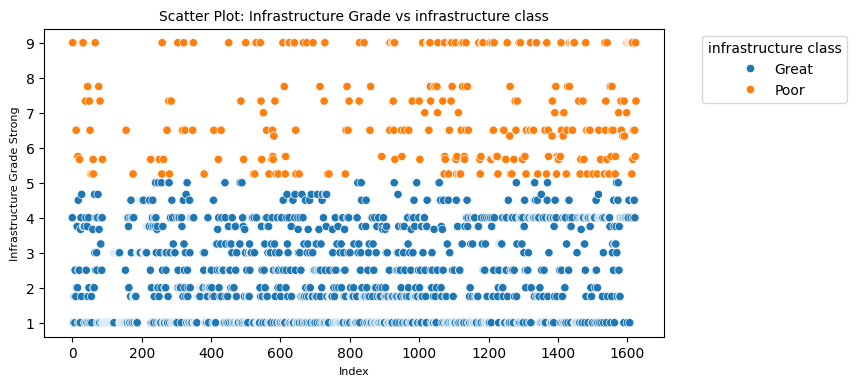

In [54]:
create_clases(number_of_clases = 2 , labels=['Great','Poor'])

#### We decided to final split into 2 classes: Has better results and clearer difference between the classes

### Handling overfitting and the rest of the Nulls

In [55]:
## Dates Fetching
df['Day_Of_Week'] = df.Date.dt.dayofweek
df['Month'] = df.Date.dt.month

df = df.drop(['End_Time', 'Date'], axis=1)
df[['Month', 'Day_Of_Week']] = df[['Month', 'Day_Of_Week']] = df[['Month', 'Day_Of_Week']].astype('category')

## Fetching Point_type
df[['Point_Type']] = df[['Point_Type']] = df[['Point_Type']].astype('category')


In [56]:
## City Fetching - Avoiding OverFitting
economical_status = pd.read_excel("economical_status.xlsx")  
economical_status = economical_status[economical_status['Unnamed: 2'].notnull()].reset_index()
economical_status = economical_status.iloc[1:, [2, 7, 9]]
columns_rename_e = ['City_Code','Area_code', 'Economical_Rate']
economical_status.columns = columns_rename_e
economical_status['Economical_Rate'] = economical_status['Economical_Rate'].astype('Float64')
economical_status = economical_status.groupby(['City_Code'], as_index=False).agg({'Economical_Rate': 'mean'})
economical_status

,City_Code,Economical_Rate
0,31,-0.869768
1,70,-0.236784
2,166,0.78359
3,168,0.79368
4,195,1.204407
...,...,...
76,9400,0.937315
77,9500,0.395968
78,9600,-0.437139
79,9700,1.516564


In [57]:
## City Fetching - Avoiding OverFitting
location_rank = pd.read_excel("location_rank.xlsx")  
location_rank = location_rank.iloc[6:, [3, 9]]
columns_rename_l = ['City_Code','Location_Rate']
location_rank.columns = columns_rename_l
location_rank['Location_Rate'] = location_rank['Location_Rate'].astype('Float64')
location_rank = location_rank.groupby(['City_Code'], as_index=False).agg({'Location_Rate': 'mean'})
location_rank

,City_Code,Location_Rate
0,7,0.423495
1,10,0.671894
2,11,0.43653
3,13,-2.36083
4,15,0.37492
...,...,...
1208,9400,1.452423
1209,9500,-0.235317
1210,9600,-0.225262
1211,9700,1.352605


In [58]:
## City Fetching - Avoiding OverFitting
df = pd.merge(df, economical_status, on=[
    "City_Code"], how='inner')
df = pd.merge(df, location_rank, on=[
    "City_Code"], how='inner')
len(df)

975

In [59]:
## Street Fetching - Avoiding OverFitting 
def classify_street(street):
    if any(keyword in street for keyword in ['דיין', 'הרצל', 'גוריון', 'רוטשילד', 'בגין', 'דיזינגוף']):
        return 'Main'
    if any(keyword in street for keyword in ['פארק', 'גן']):
        return 'Park'
    if any(keyword in street for keyword in ['קניון', 'מרכז מסחרי', 'שוק']):
        return 'Commercial'
    if any(keyword in street for keyword in ['תחנת דלק', 'תחנת רכבת']):
        return 'Transportation'
    if any(keyword in street for keyword in ['בית ספר', 'מתנ"ס', 'קופת חולים']):
        return 'Public Facility'
    if any(keyword in street for keyword in [
    'מכללת' , 'שדרה', 'דרך', 'מרכז', 'מכללה', 'טיילת', 'כיכר']):  
        return 'Popular'
    return 'Other'

df['Street_Group'] = df['Measurement_Point_Description'].apply(lambda x: classify_street(x))

df.head()

,City,City_Code,Measurement_Point_Description,Point_Type,Cigarette_Butts,Cigarette_Boxes,Surgical_Masks,Drink_Containers,Drink_Container_Caps,Paper_Takeaway_Packaging,...,Bin_Count,infrastructure_grade,infrastructure_grade_strong,infrastructure_final_grade,infrastructure_class,Day_Of_Week,Month,Economical_Rate,Location_Rate,Street_Group
0,רמלה,8500,רחוב זכריה,רחוב מגורים,2,4,0,0,0,4,...,1,2.00,4.00,1,Great,2,7,-0.535233,1.272301,Other
1,רמלה,8500,בן גוריון,רחוב מגורים,5,3,1,3,0,0,...,1,2.50,6.50,1,Poor,0,7,-0.535233,1.272301,Main
2,רמלה,8500,רחוב בן צבי,רחוב מגורים,20,3,2,0,10,0,...,1,1.75,3.75,1,Great,0,7,-0.535233,1.272301,Other
3,רמלה,8500,יהודה שטיין כיכר גיבורי ישראל,רחוב מגורים,95,16,10,11,11,5,...,1,1.75,3.75,1,Great,0,7,-0.535233,1.272301,Popular
4,רמלה,8500,רחוב הצנחנים,רחוב מגורים,25,2,7,4,2,1,...,1,2.25,5.75,1,Poor,1,7,-0.535233,1.272301,Other


In [60]:
df['Street_Group'].value_counts() ## We will try to see the result of the model with the 'Other' group.
## if the result will be poor, we will try to delete it.

Other              674
Commercial         106
Park               106
Popular             51
Main                22
Public Facility     13
Transportation       3
Name: Street_Group, dtype: int64

In [61]:
df['Organic_Waste'] = df.groupby(['City_Code'])['Organic_Waste'].transform(lambda x: x.fillna(x.mean()))

In [62]:
df.dtypes

City                                  object
City_Code                             object
Measurement_Point_Description         object
Point_Type                          category
Cigarette_Butts                        int64
Cigarette_Boxes                        int64
Surgical_Masks                         int64
Drink_Containers                       int64
Drink_Container_Caps                   int64
Paper_Takeaway_Packaging               int64
Plastic_Takeaway_Packaging             int64
Disposable_Plates                      int64
Disposable_Cutlery                     int64
Disposable_Cold_Drink_Cups             int64
Disposable_Hot_Drink_Cups              int64
Snack_Packaging                        int64
Non_Bottle_Glass                       int64
Other_Paper                            int64
Other_Plastic                          int64
Organic_Waste                        float64
Illegal_Dumping                        int64
Other_Waste                            int64
Dog_Feces 

In [63]:
numeric_cols = [col for col in df.columns if df[col].dtype in [
    "int64","float64"] and col not in['Economical_Rate', 'Location_Rate']]

### Examine Outlires

In [64]:
 def create_box_plot_per_class ():
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='infrastructure_class', y=col)  
    plt.title(f'Boxplot of {col} grouped by infrastructure class')
    plt.show()

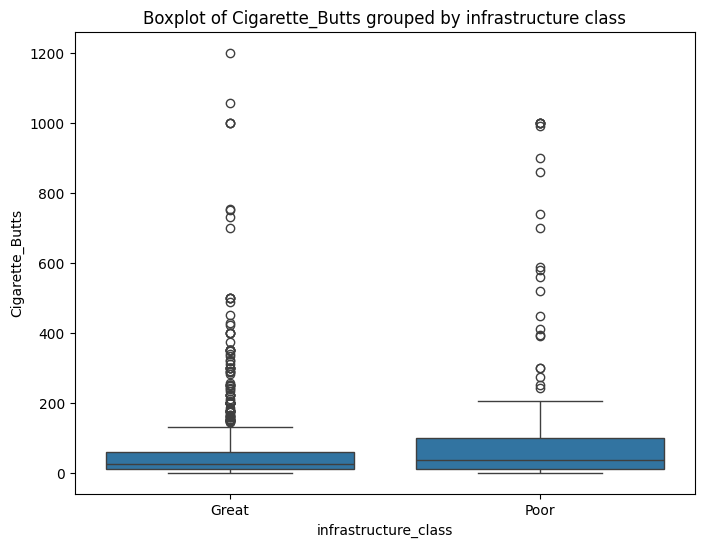

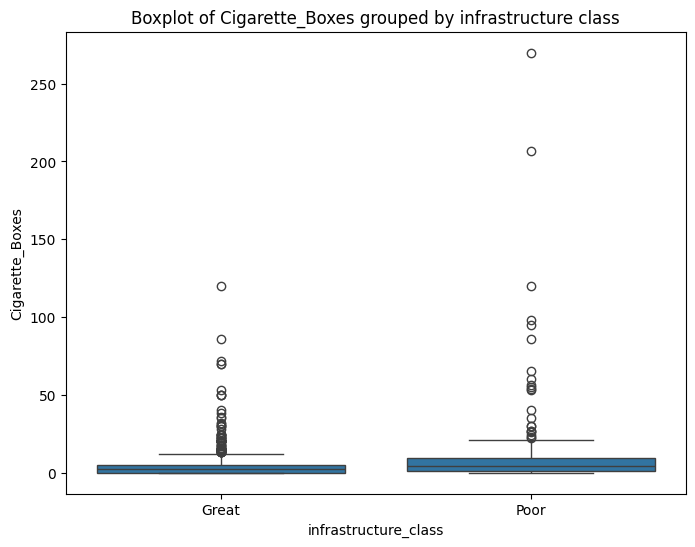

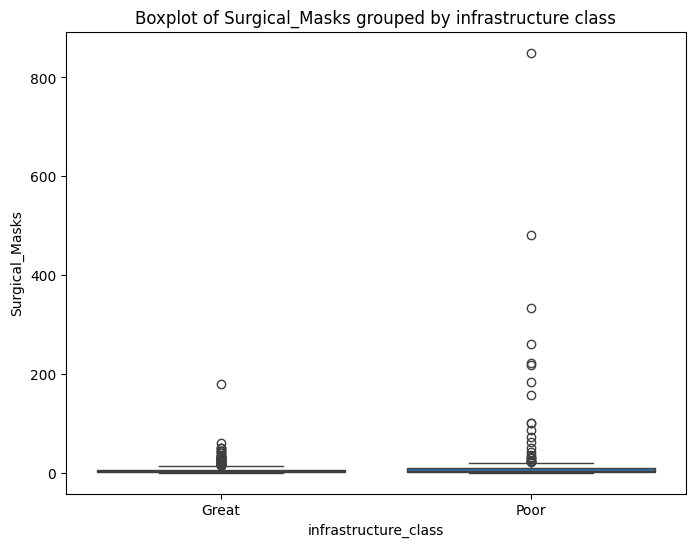

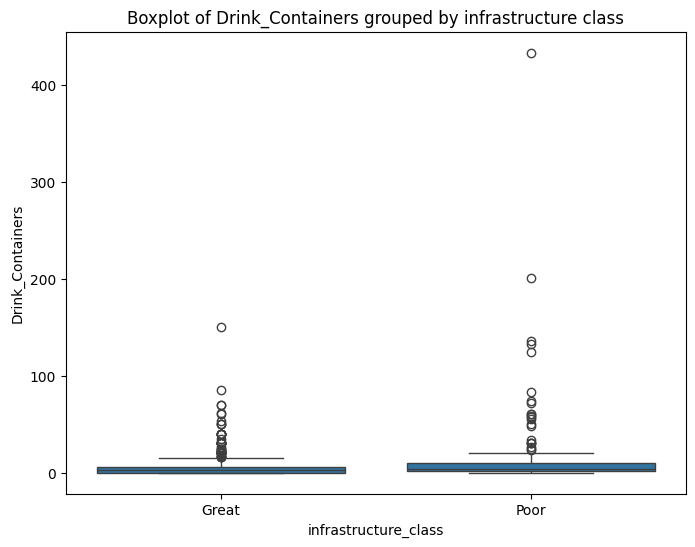

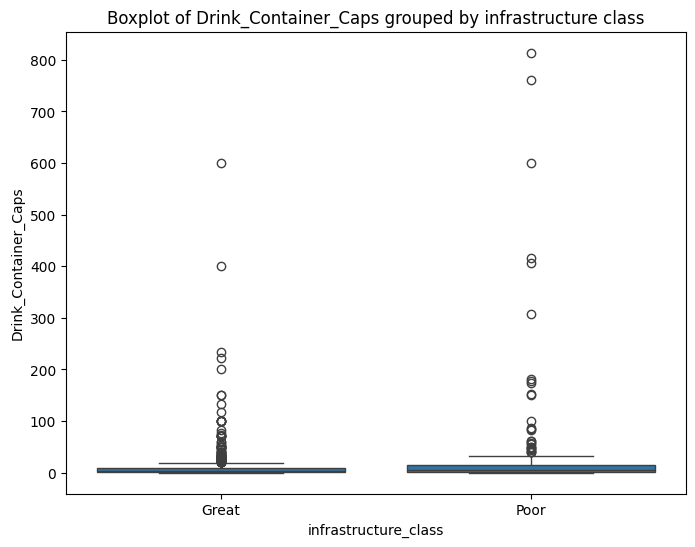

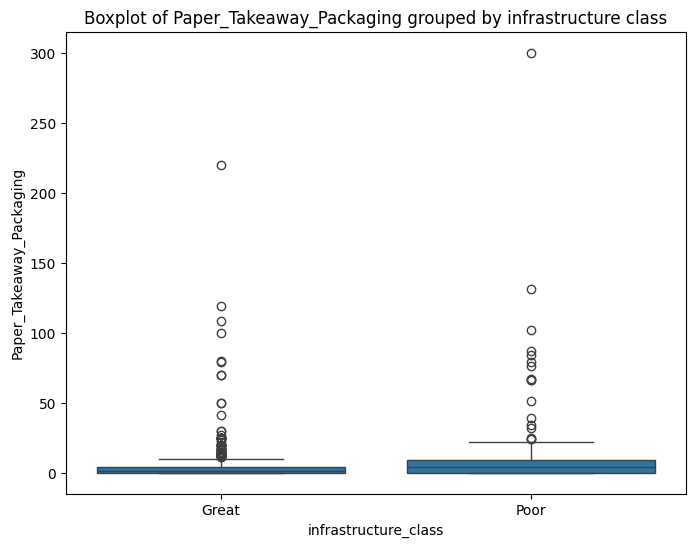

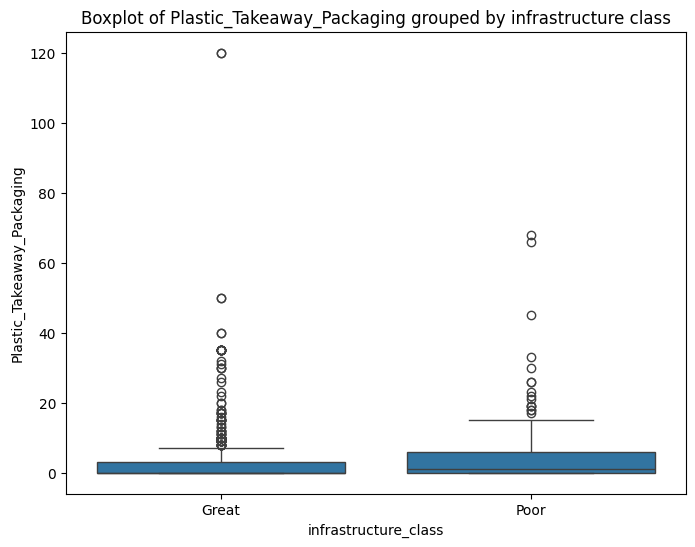

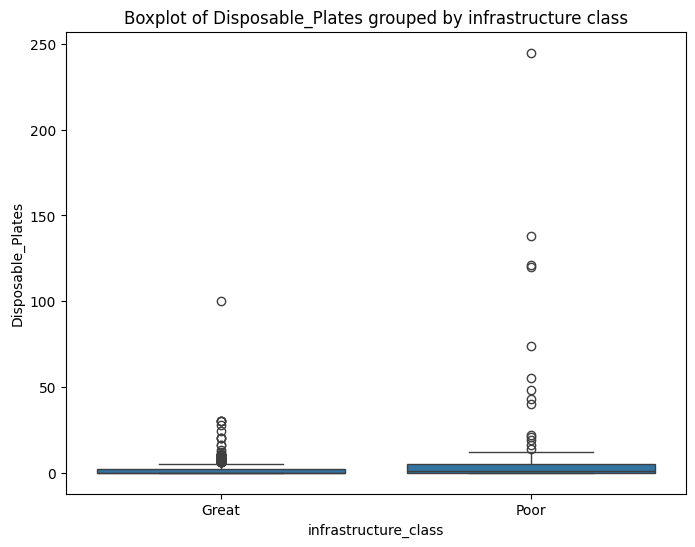

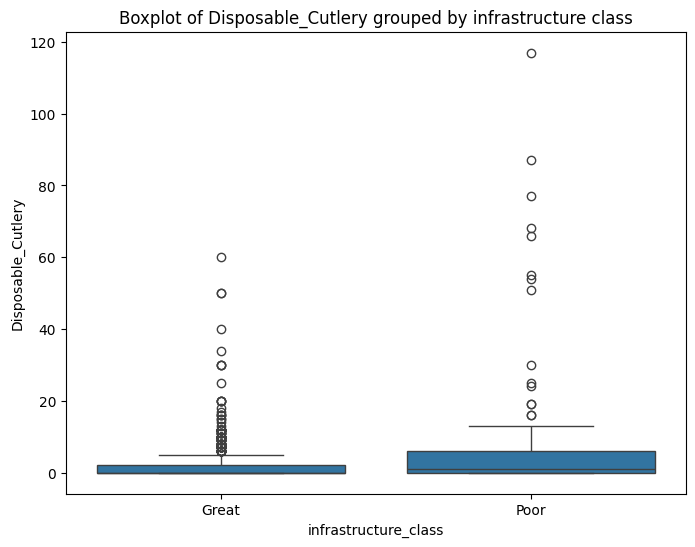

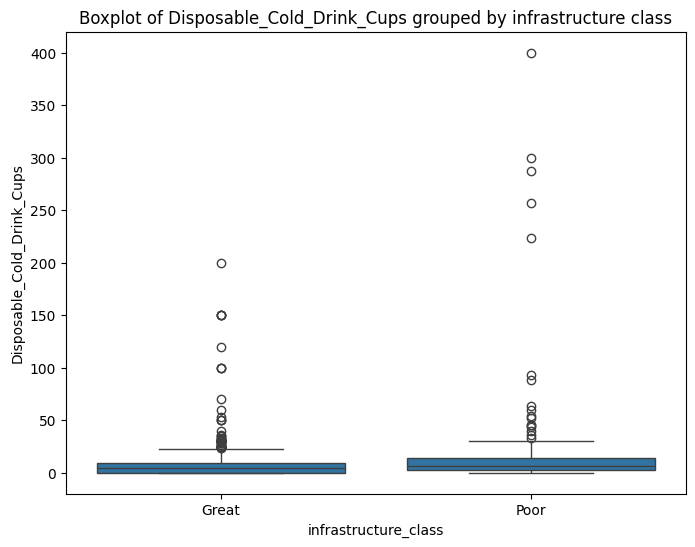

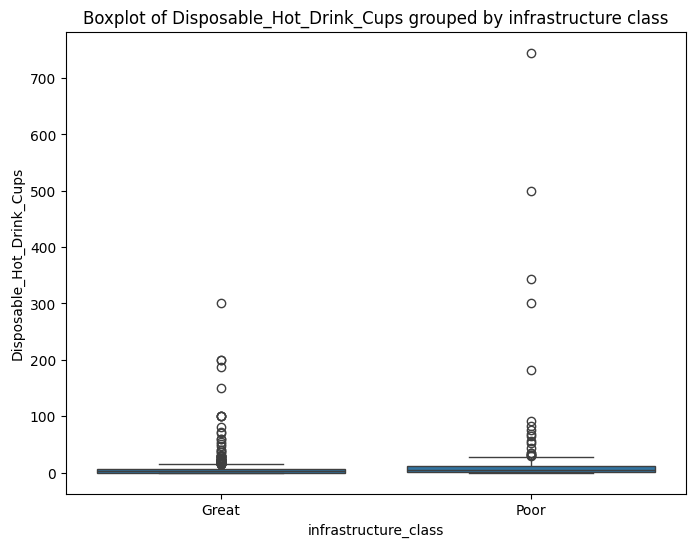

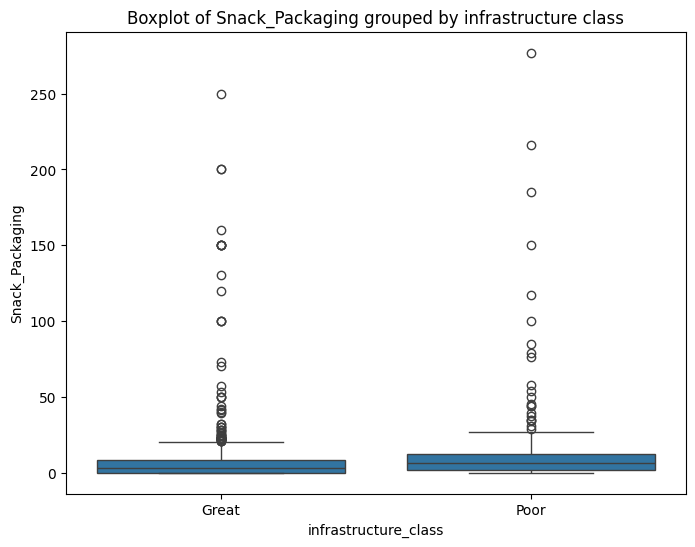

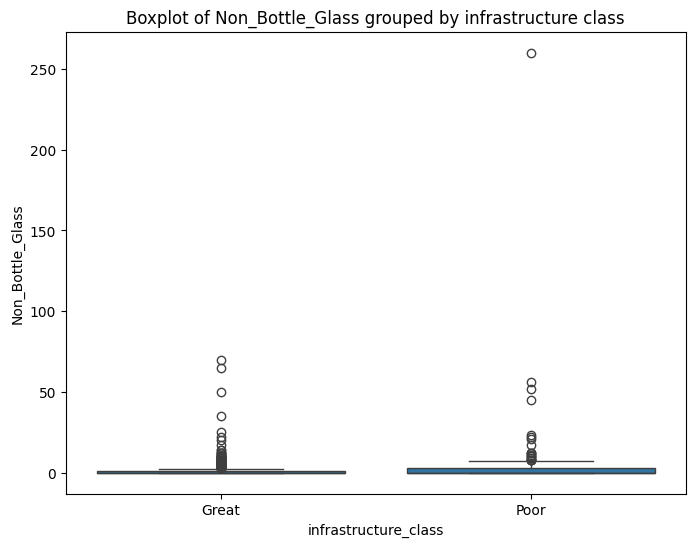

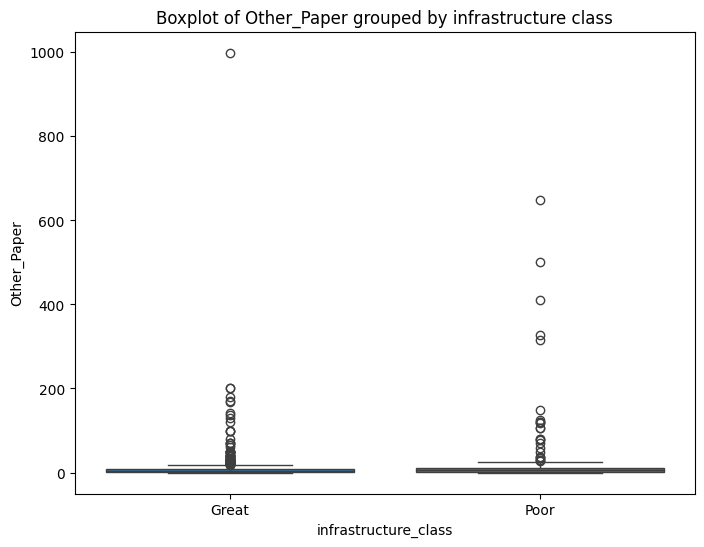

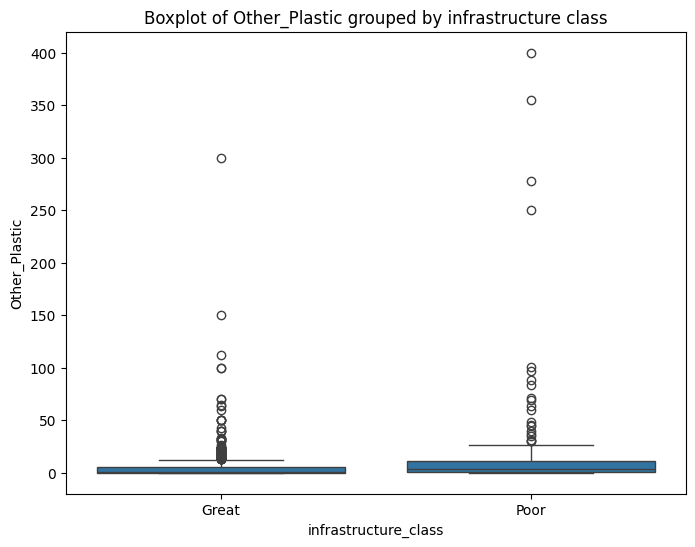

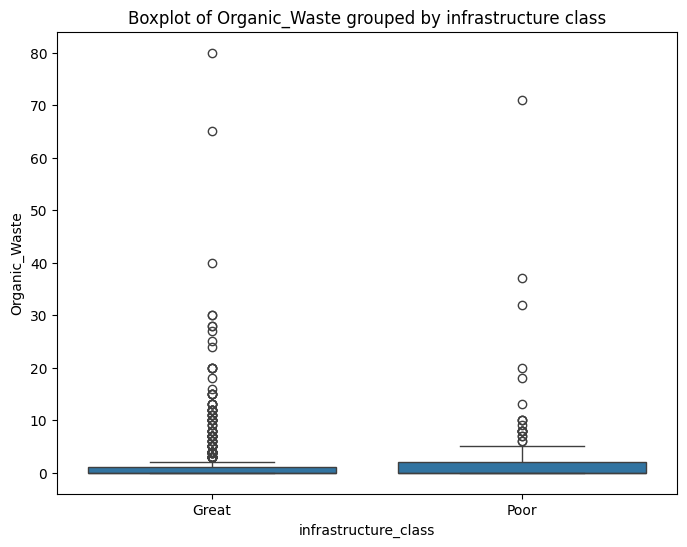

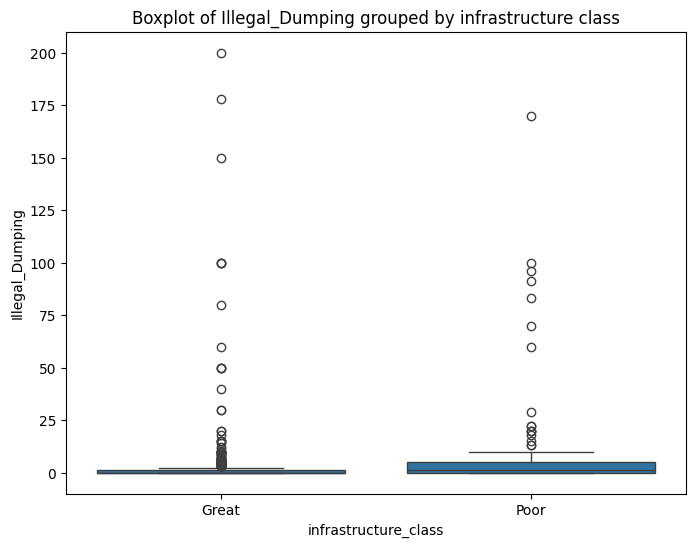

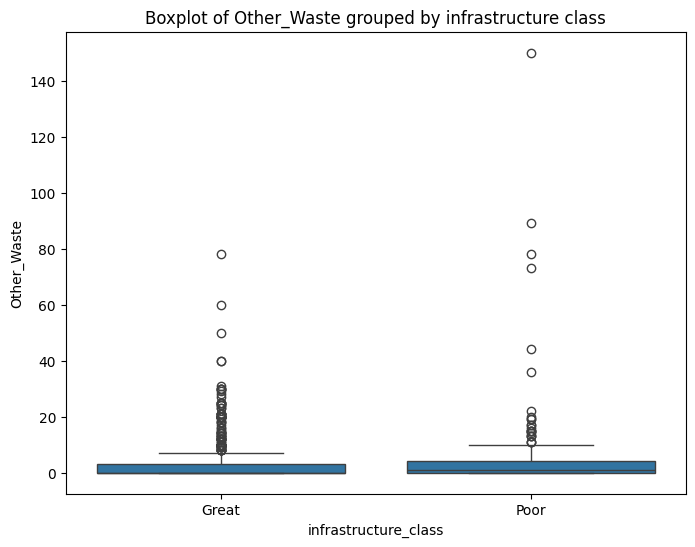

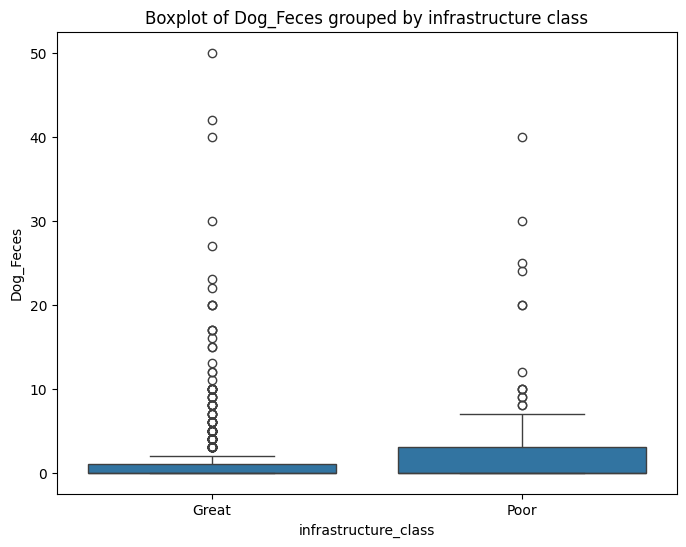

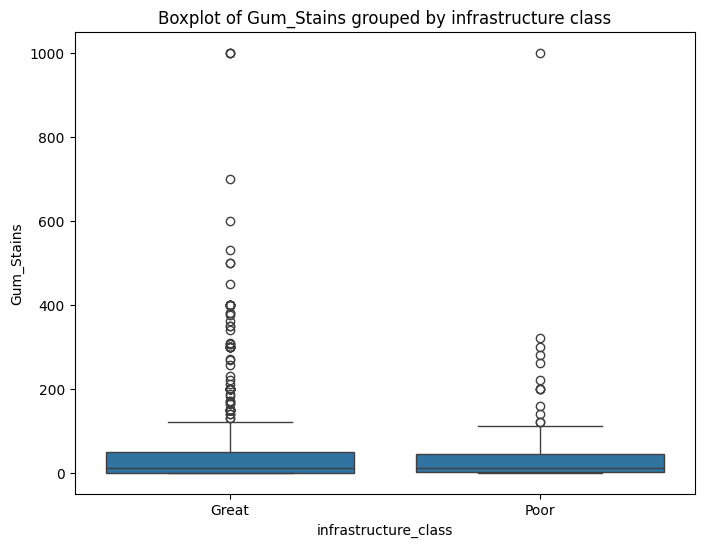

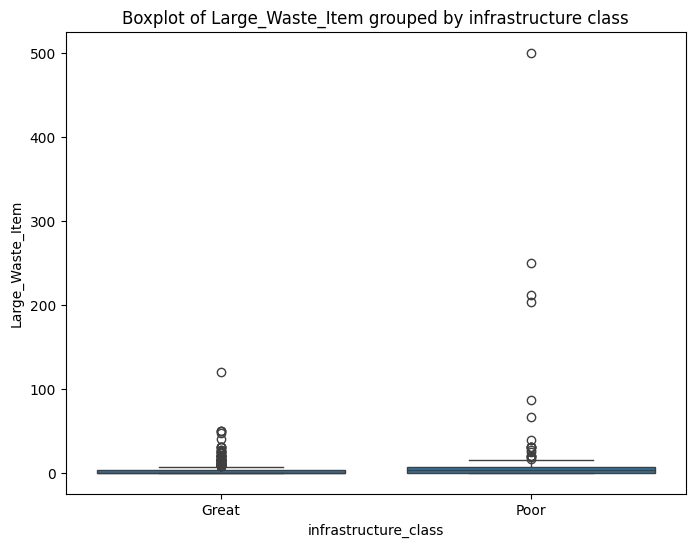

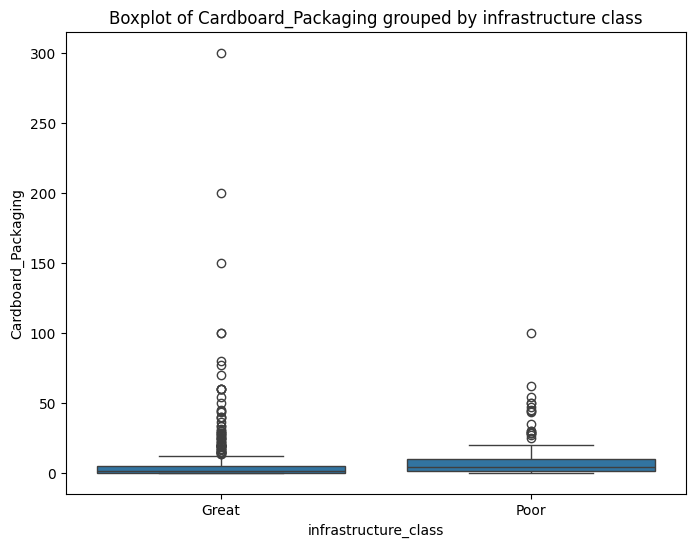

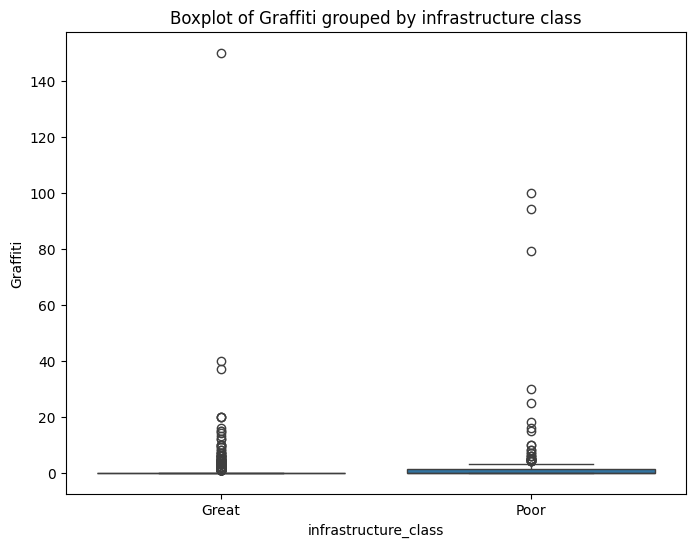

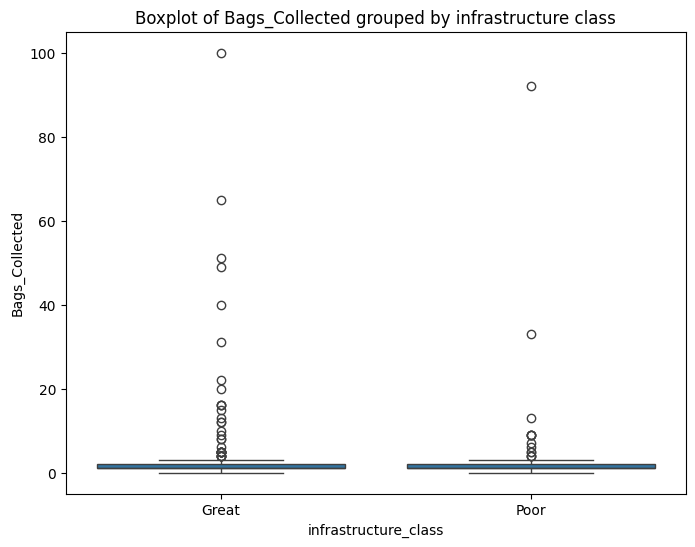

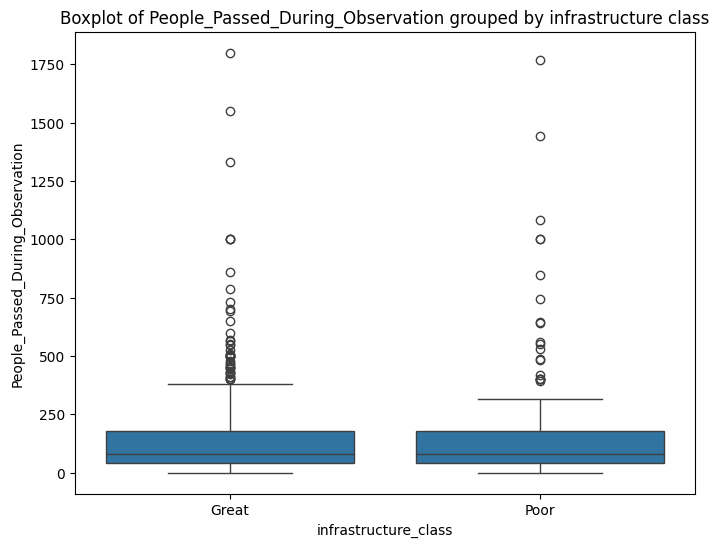

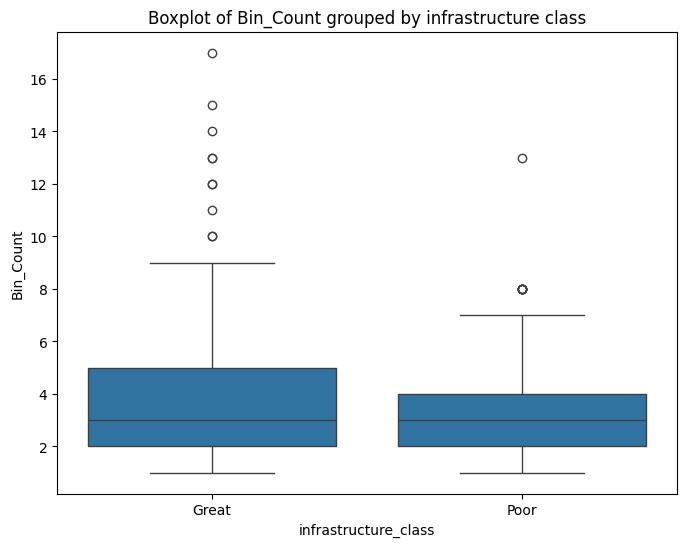

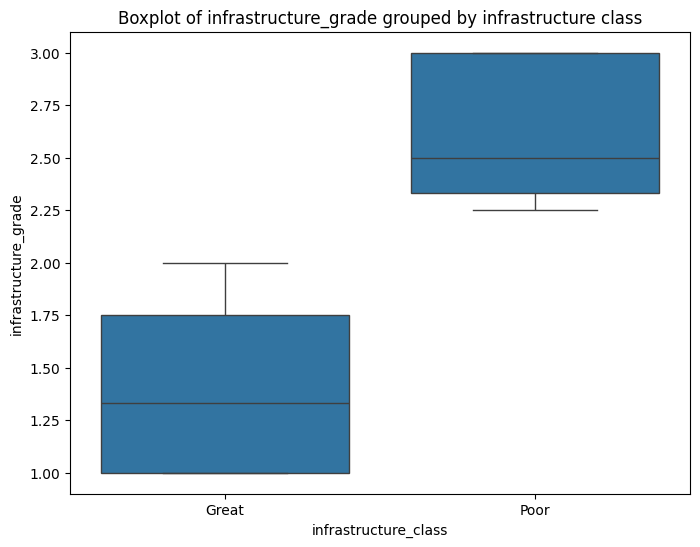

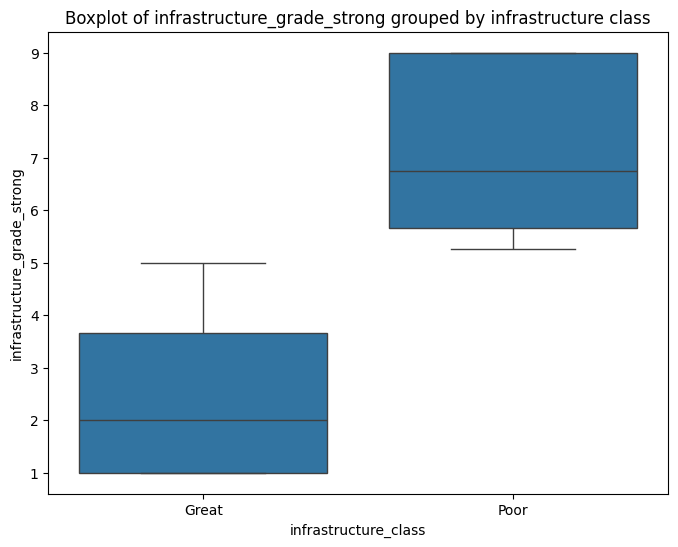

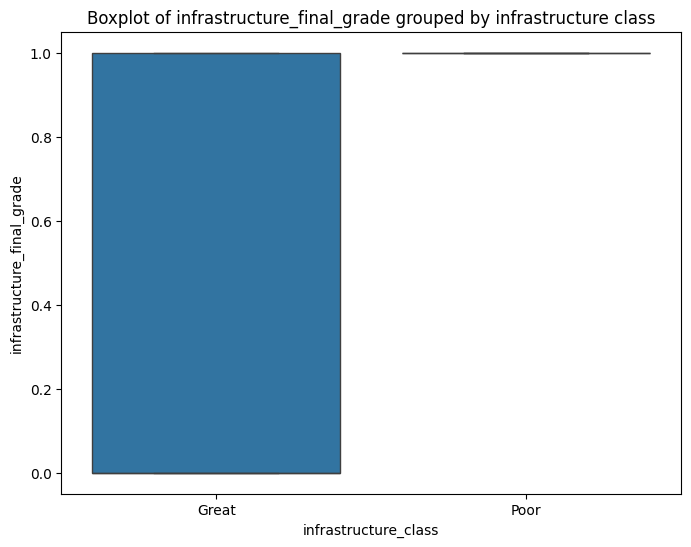

In [65]:
## Examining Outlieres
for col in numeric_cols:
   create_box_plot_per_class()

In [66]:
## We took a representing column and cut the top 20% of the data.
## That's because most of the columns values located in the bottom of the graph.
percentile_80 = df['Cigarette_Butts'].quantile(0.8)
filtered_df = df[df['Cigarette_Butts'] < percentile_80]

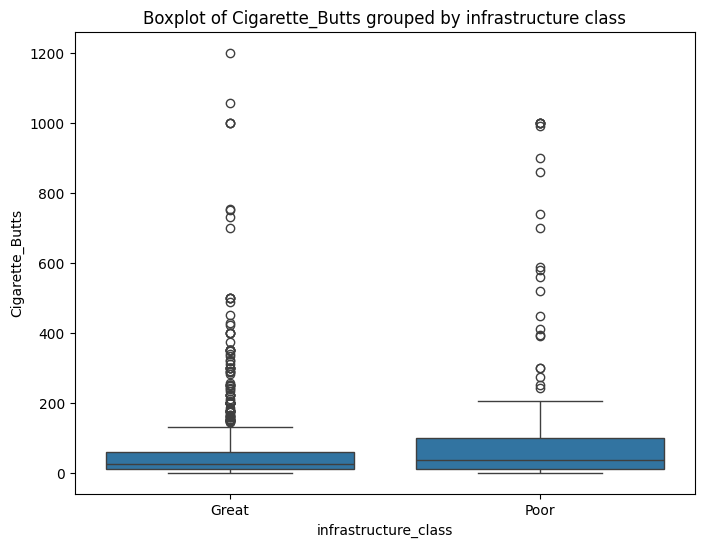

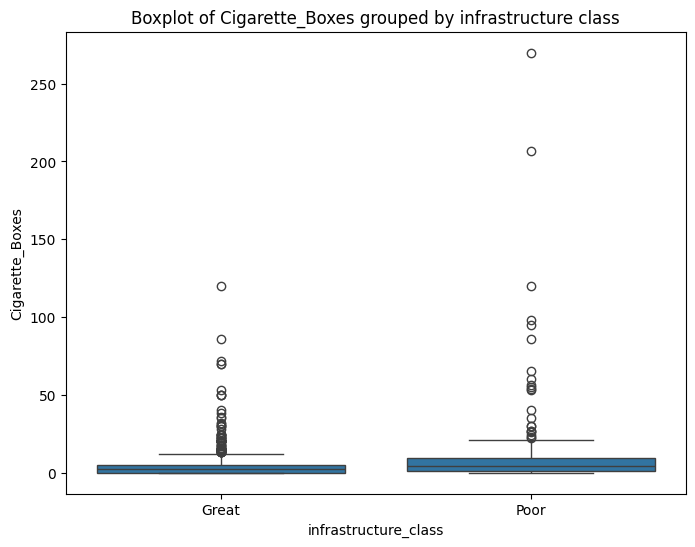

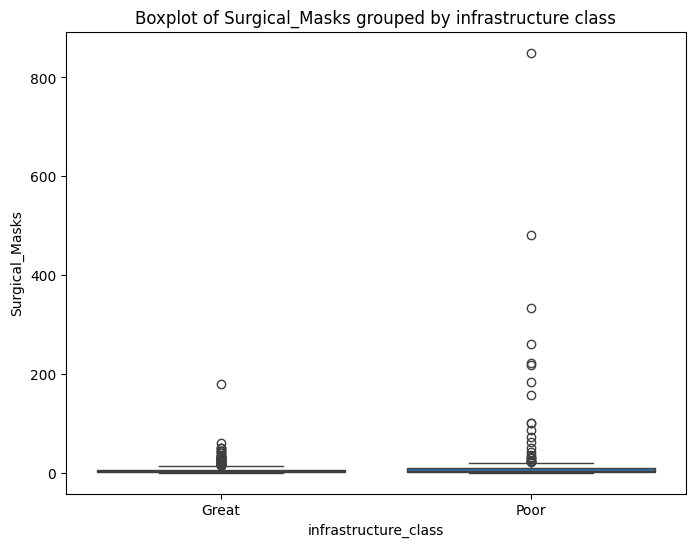

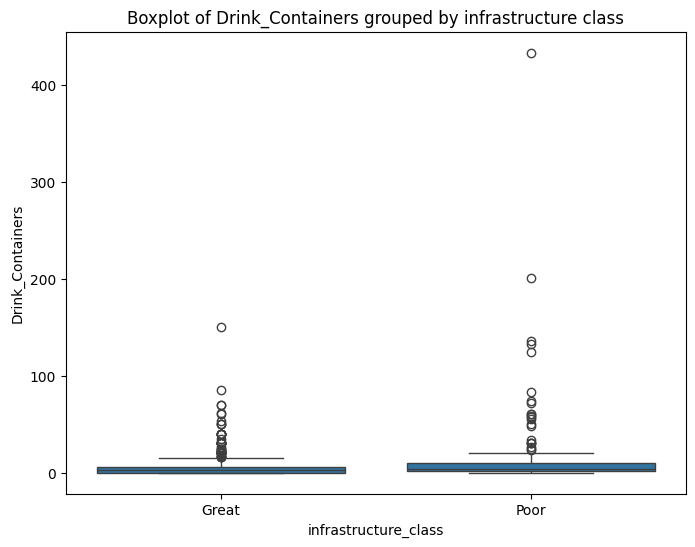

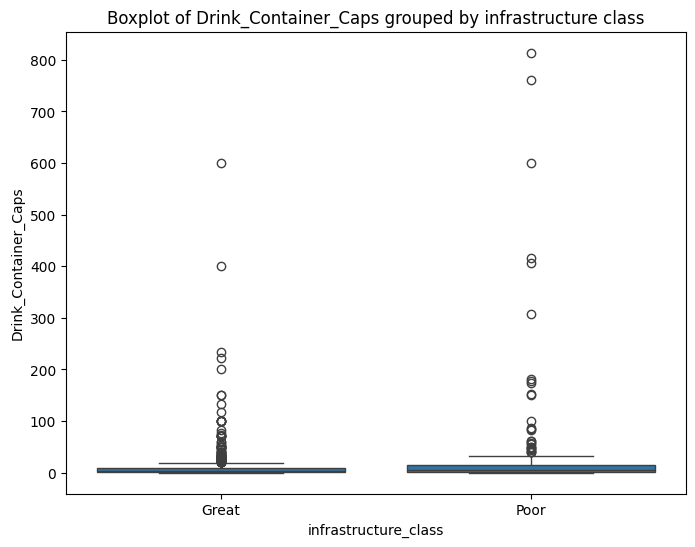

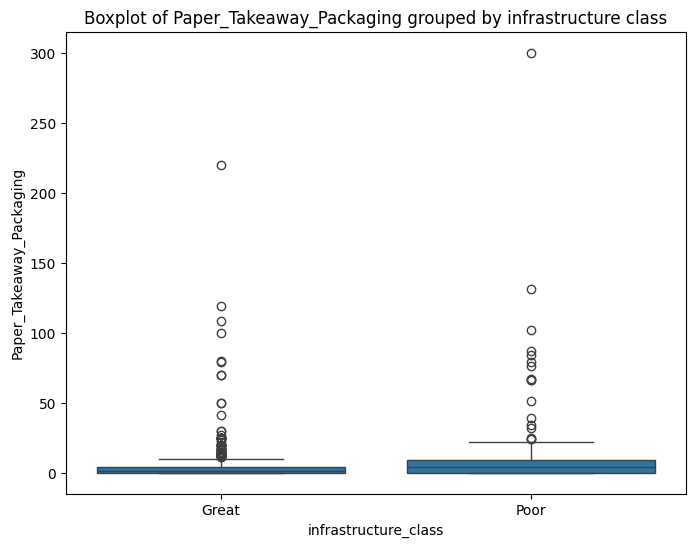

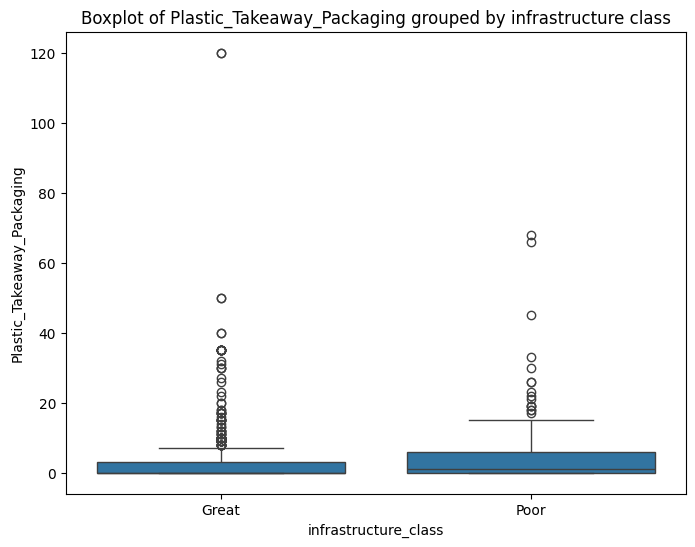

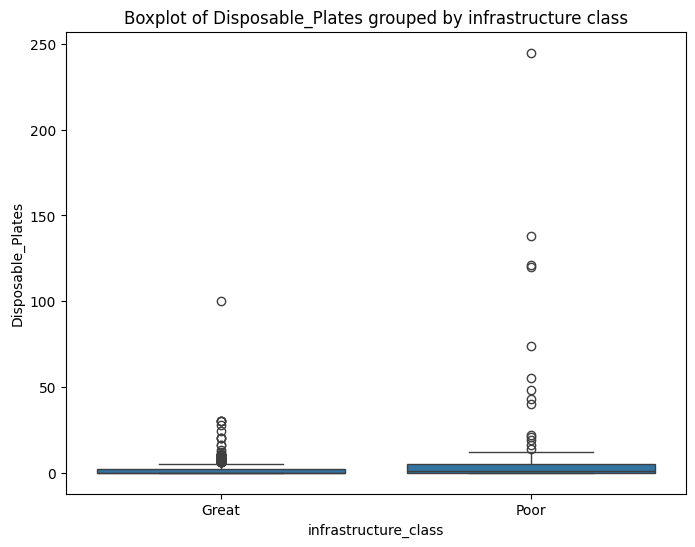

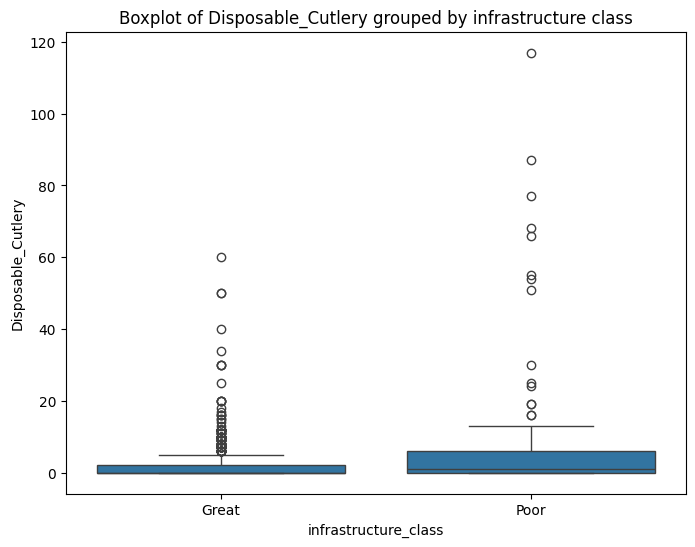

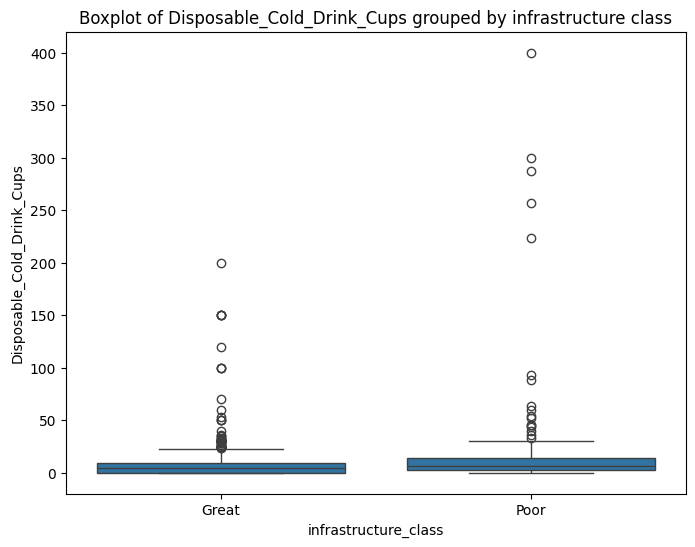

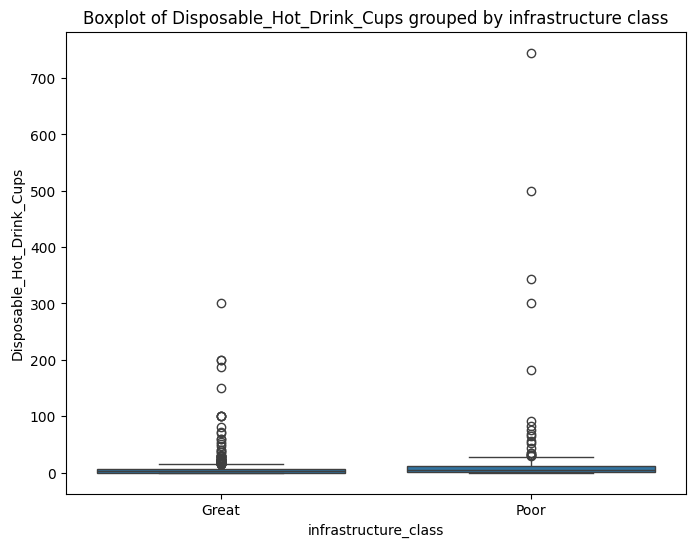

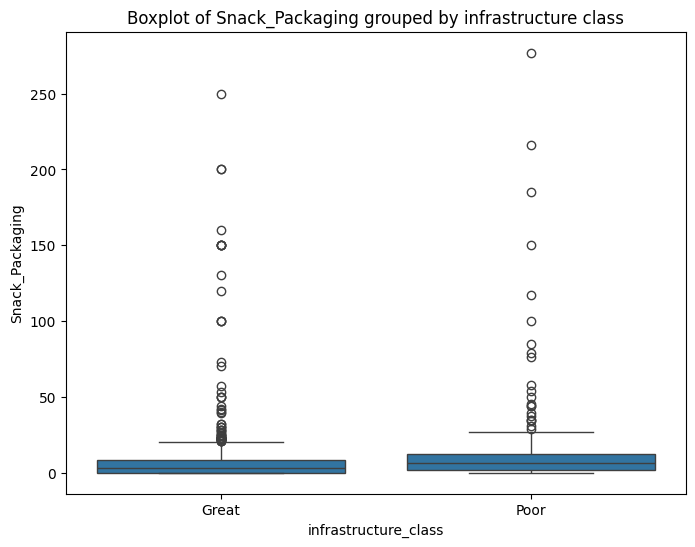

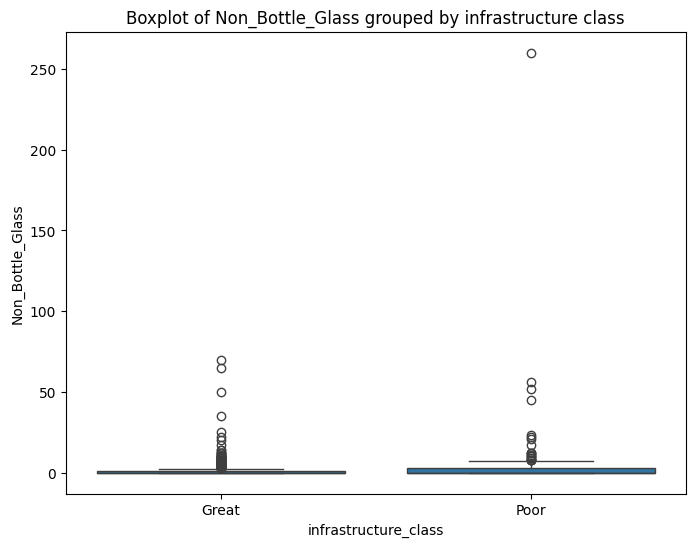

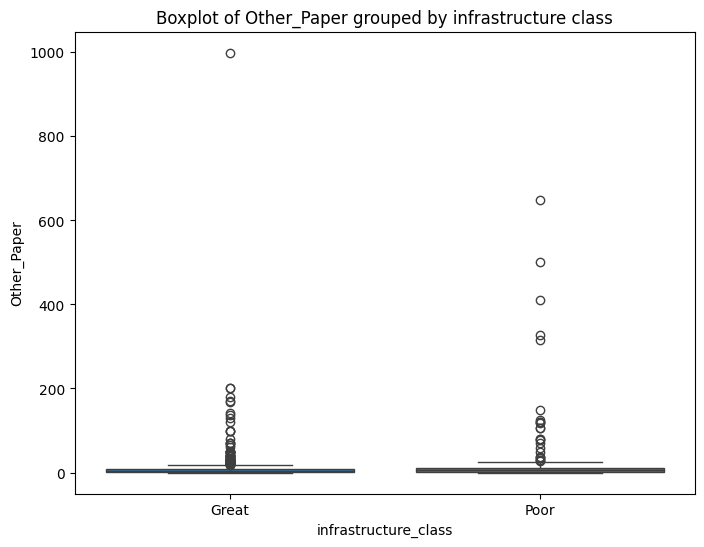

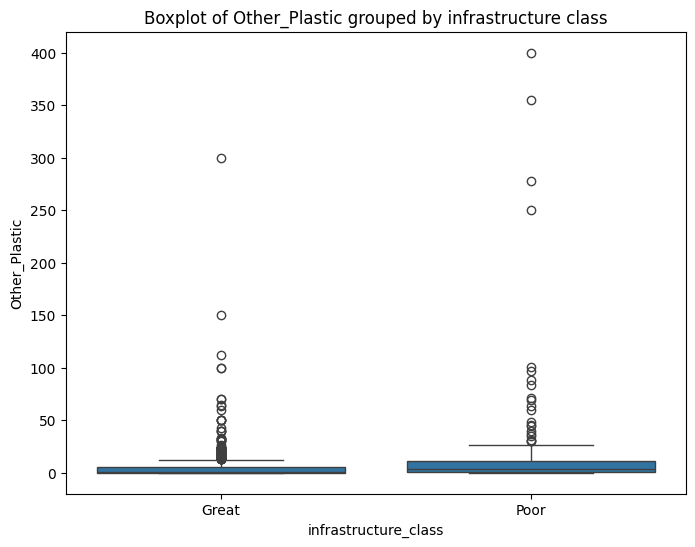

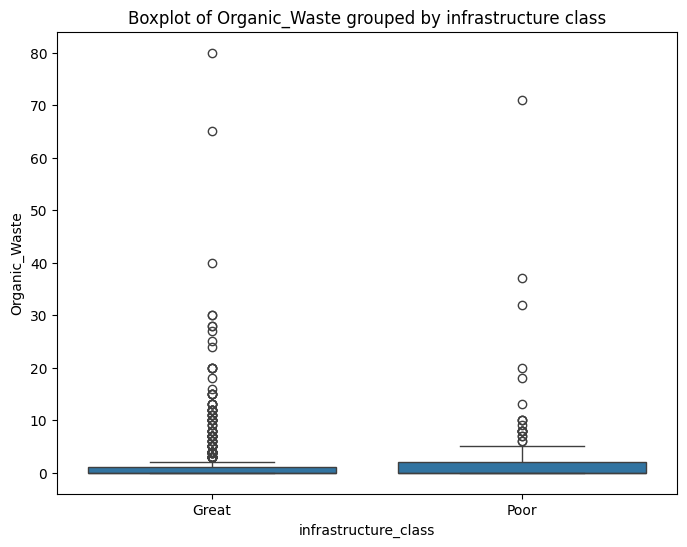

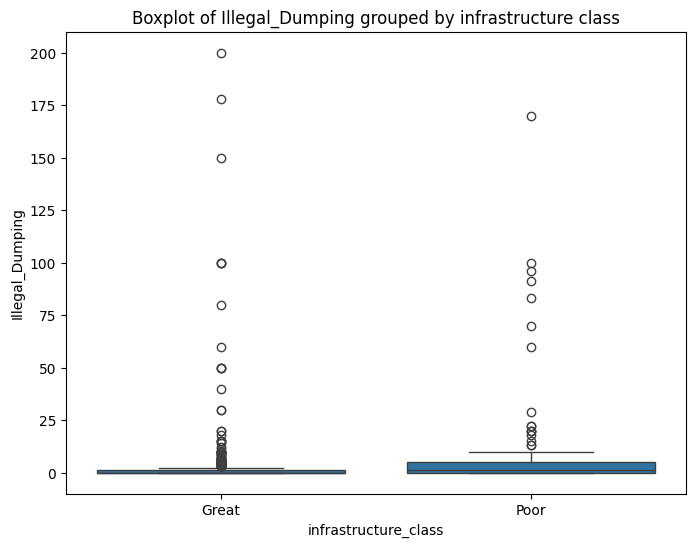

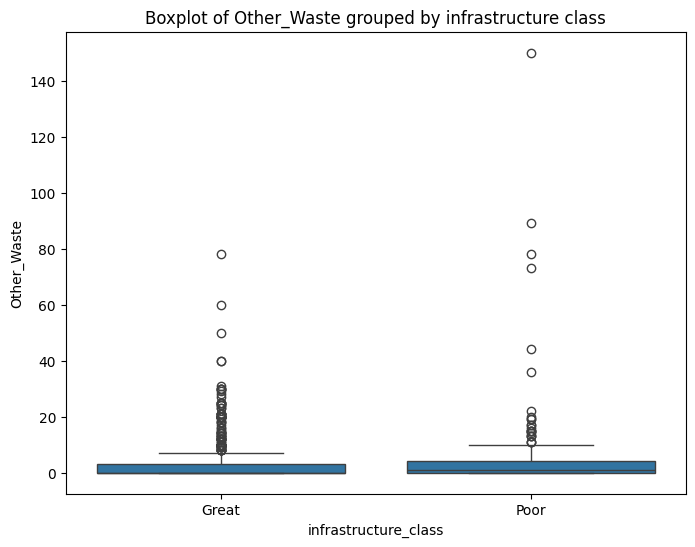

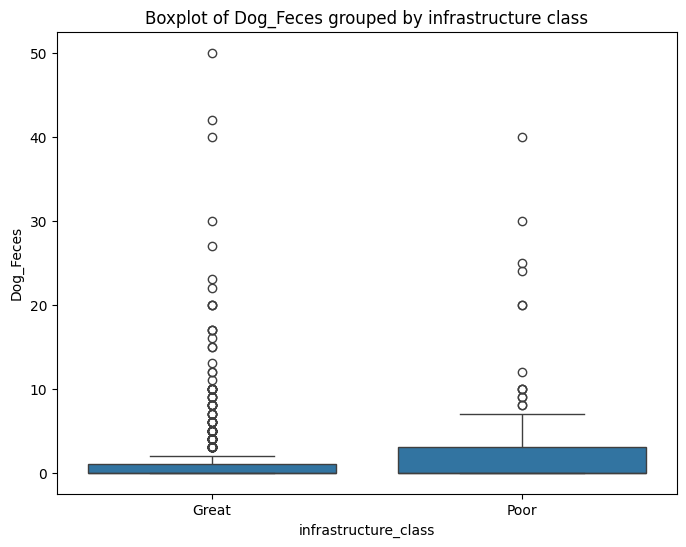

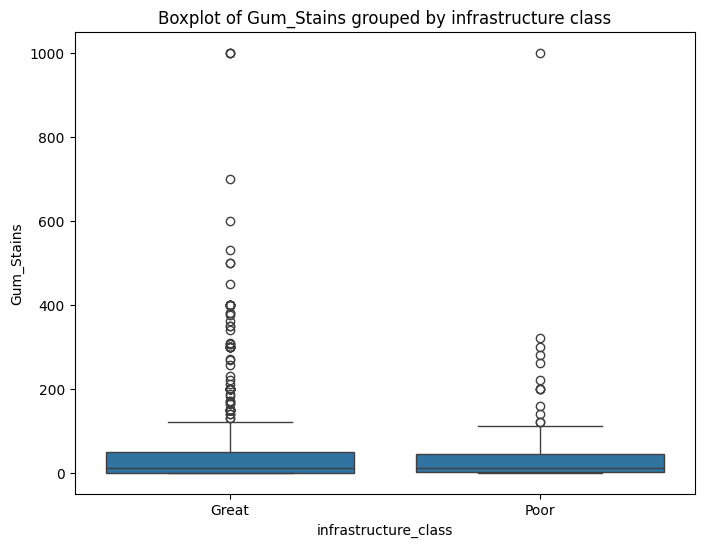

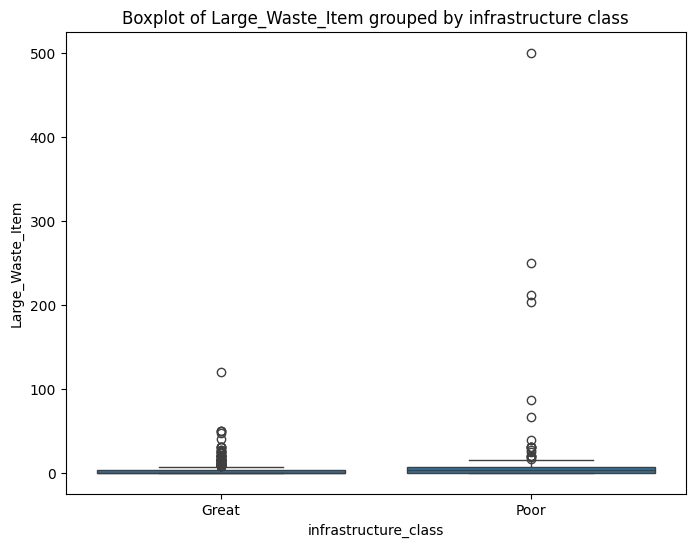

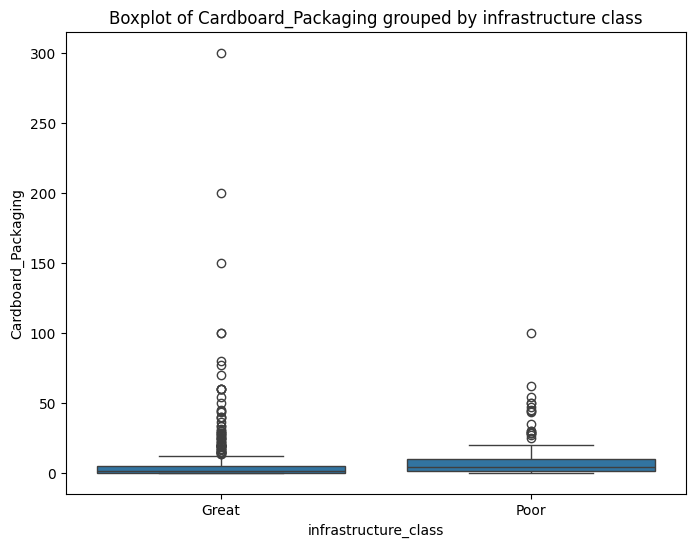

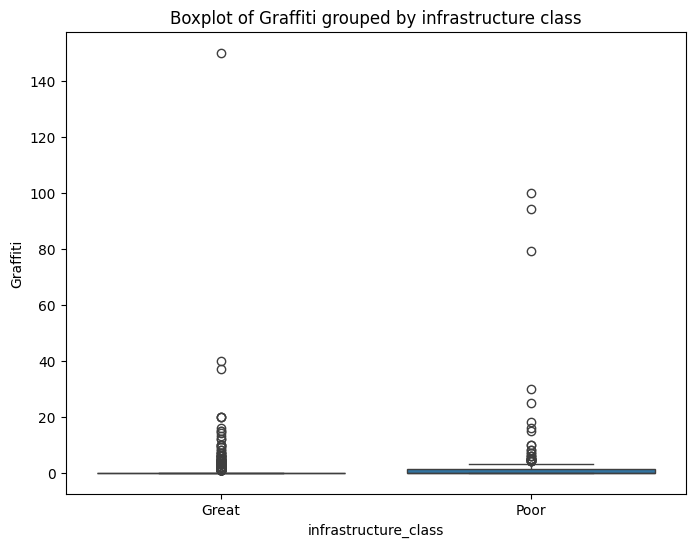

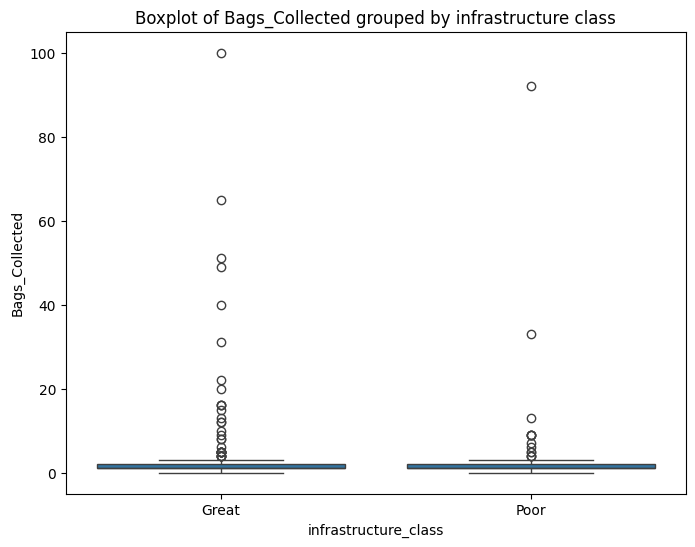

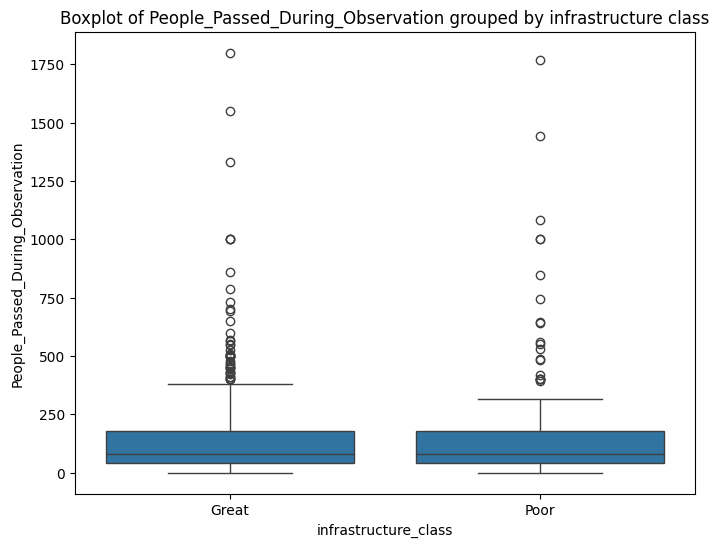

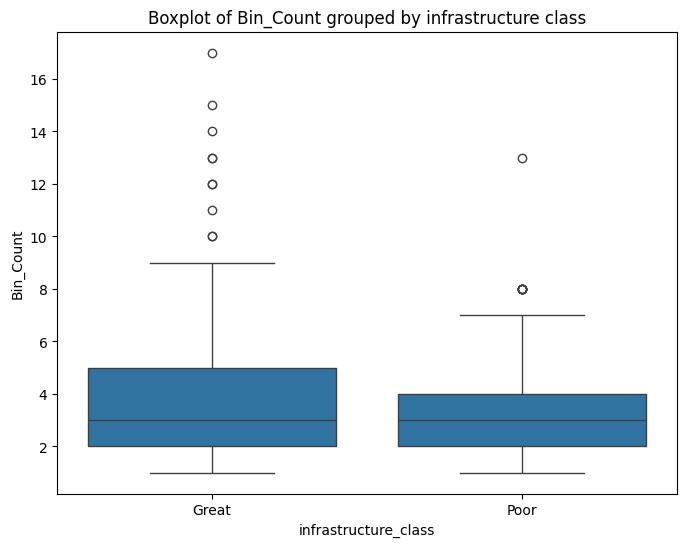

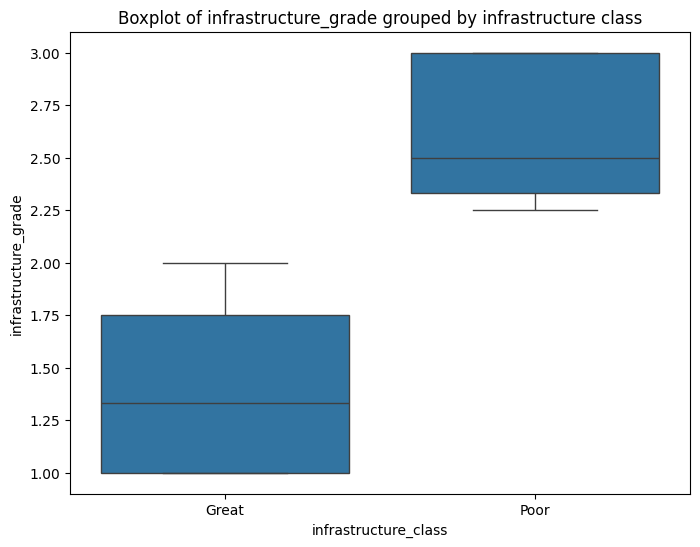

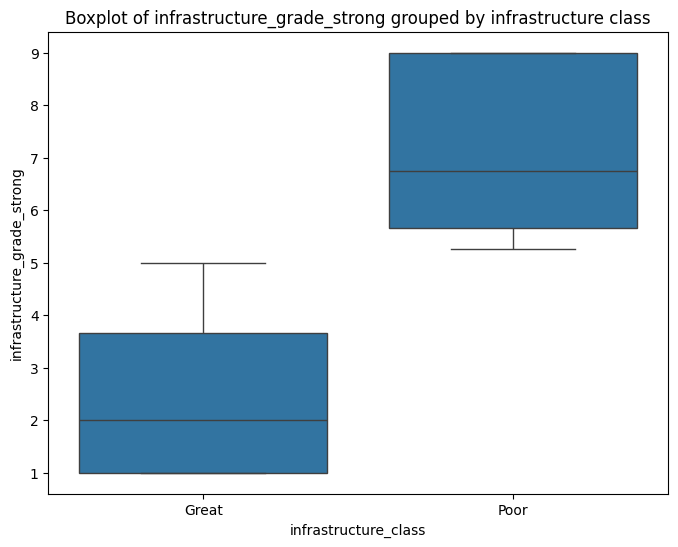

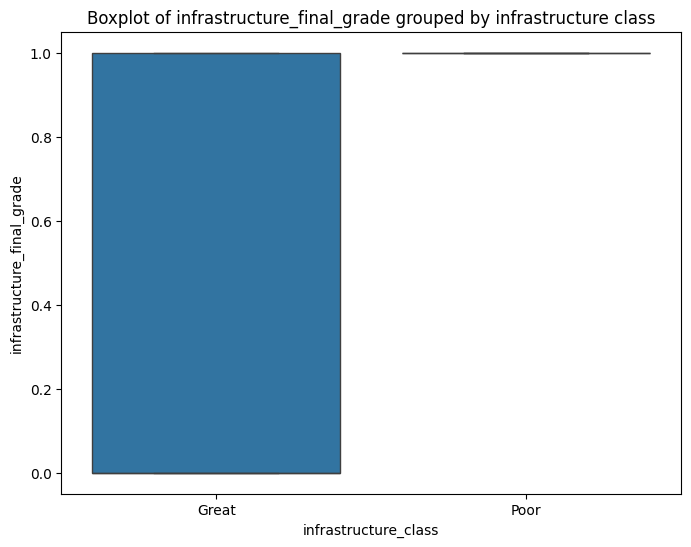

In [67]:
for col in numeric_cols:
   create_box_plot_per_class()

In [68]:
percentile_80_dict = {}
for col in numeric_cols:
    percentile_80 = df[col].quantile(0.80)
    if percentile_80 >=10:
        percentile_80_dict[col] = percentile_80

In [69]:
percentile_80_dict

{'Cigarette_Butts': 84.0,
 'Drink_Container_Caps': 11.0,
 'Disposable_Cold_Drink_Cups': 12.0,
 'Snack_Packaging': 10.0,
 'Other_Paper': 10.0,
 'Gum_Stains': 55.0,
 'People_Passed_During_Observation': 217.0}

In [70]:
## There are 7 columns which their top 20% values are greater than 10 
## (which is quite big number in compare to the avarages)
## We tried to identify and highlight what are the rows which the person who "reported" them-
## reported outlired number in 6+ categories (columns).
for index, row in df.iterrows():
    counter_outliers = 0
    for col in percentile_80_dict.keys():
        if row[col] >= percentile_80_dict[col]:
            counter_outliers +=1
    if counter_outliers >= 6:
        df.loc[index,['outlier']] = True
    else:
        df.loc[index,['outlier']] = False

In [71]:
df.outlier.sum()

45

In [72]:
df = df[df['outlier'] == False ]

### Dimensionality Reduction 

In [73]:
df = df.drop(['City','Measurement_Point_Description','infrastructure_grade','infrastructure_grade_strong', 'City_Code','infrastructure_final_grade'], axis=1)

In [74]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_cols]

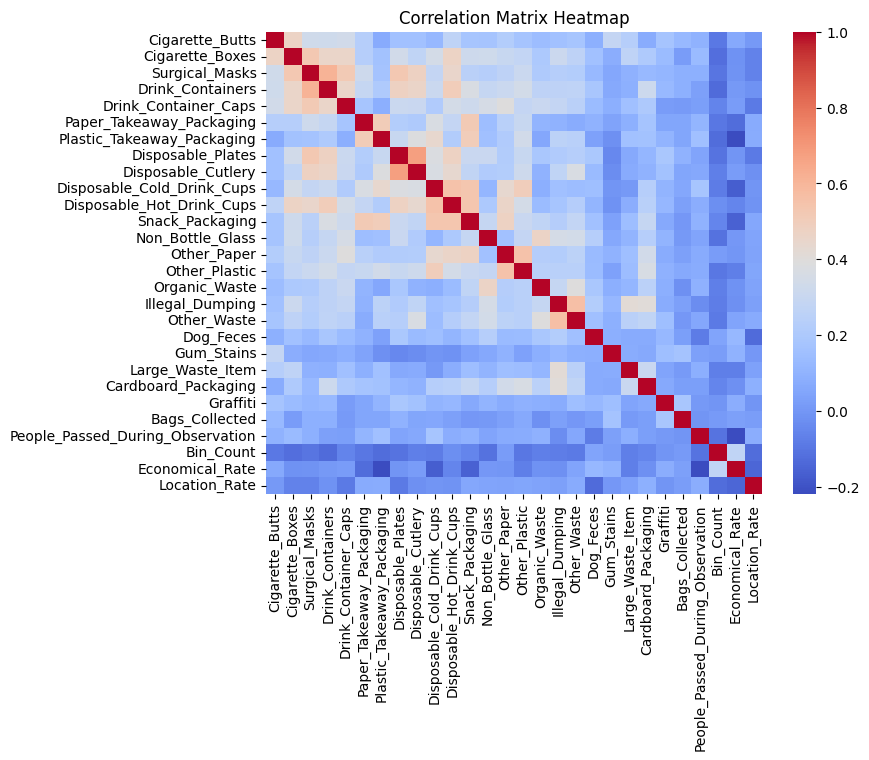

In [75]:
corr_matrix = df_numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

### Encode category columns  

In [76]:
def convert_categorial_by_encoder(X, categorical_cols):
    ohe = OneHotEncoder(drop='first',sparse_output=False) 
    encoded_categorical = ohe.fit_transform(X[categorical_cols])
    encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=ohe.get_feature_names_out(categorical_cols))
    return encoded_categorical_df

In [77]:
def normlize_nomarical_features(X,numerical_cols):
    for col in numerical_cols:
        X[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    return X[numerical_cols]

In [78]:
def normalize_and_encode (df_prepared):
    for col in ['Point_Type', "Has_Bins","Day_Of_Week","Month","Street_Group"]:
        df[col] = df[col].astype('category')
        
    y = df_prepared["infrastructure_class"]
    X = df_prepared.drop("infrastructure_class", axis=1)  # "depth_bins_infrastructure_grade_strong" is the target variable
    
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X.select_dtypes(include=['category']).columns

    encoded_categorical_df=convert_categorial_by_encoder(X,categorical_cols)
    scaled_numerical_df=normlize_nomarical_features(X,numerical_cols)
    
    # Combine features
    X_processed = pd.concat([encoded_categorical_df, scaled_numerical_df], axis=1)
    
    # Concat 
    normal_df=pd.concat([X_processed, y], axis=1).dropna() 

    return normal_df

In [79]:
final_df = normalize_and_encode(df)
final_df.sample(2)

,Point_Type_מבנה ציבור,Point_Type_מרכז מסחרי,Point_Type_פנאי ונופש,Point_Type_רחוב מגורים,Point_Type_רחוב מסחרי,Has_Bins_1.0,Day_Of_Week_1,Day_Of_Week_2,Day_Of_Week_3,Day_Of_Week_4,...,Gum_Stains,Large_Waste_Item,Cardboard_Packaging,Graffiti,Bags_Collected,People_Passed_During_Observation,Bin_Count,Economical_Rate,Location_Rate,infrastructure_class
423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.02,0.000,0.00,0.0,0.01,0.022222,0.125,0.709818,0.40547,Great
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.008,0.01,0.0,0.01,0.038889,0.000,0.68109,0.932494,Great


## Supervised Model- Classifications

In [81]:
# !pip install xgboost
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier


In [82]:
# Load sample data
data = final_df.copy()
y = data["infrastructure_class"]
X = data.drop("infrastructure_class", axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Weighted for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results[name] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
    }

print("Final Results:")
summary = pd.DataFrame(results).T
print(summary)

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training Support Vector Machine...
Final Results:
                        Accuracy  Precision    Recall  F1-Score
Logistic Regression     0.816667   0.666944  0.816667  0.734251
Decision Tree           0.800000   0.786057  0.800000  0.792000
Random Forest           0.838889   0.825969  0.838889  0.796083
Support Vector Machine  0.816667   0.666944  0.816667  0.734251


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### The best classification model is 'Random Forest'- it has good total accuarcy of more than 70%